In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time
import random
import math
from os import listdir
%load_ext Cython

data_path = 'data/'
symbols_path = 'symbols/'

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [184]:
def plot_gray(img):
    plt.imshow(img, vmin = 0, vmax = 255, cmap = 'gray')
    
def plot_color(img):
    plt.imshow(img)
    
def plot_in_window(img):
    cv.namedWindow('image', cv.WINDOW_NORMAL)
    cv.imshow('image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
def resize(img, max_resolution = 1500):
    rs_factor = max_resolution / max(img.shape)
    if rs_factor >= 1:
        return img
    return cv.resize(img, None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)

def put_text(img, text, coords):
    return cv.putText(img, text, coords, cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))

In [180]:
#files = listdir(data_path)
#files.sort()

files = ['bach-113.jpg', 'bach-114.jpg', 'bach-122.jpg', 'mozart-k1e.jpg', 'mozart-k2.jpg']

In [185]:
data = []
for file in files:
    img = cv.imread(data_path + file, cv.IMREAD_GRAYSCALE)
    data.append(resize(img))

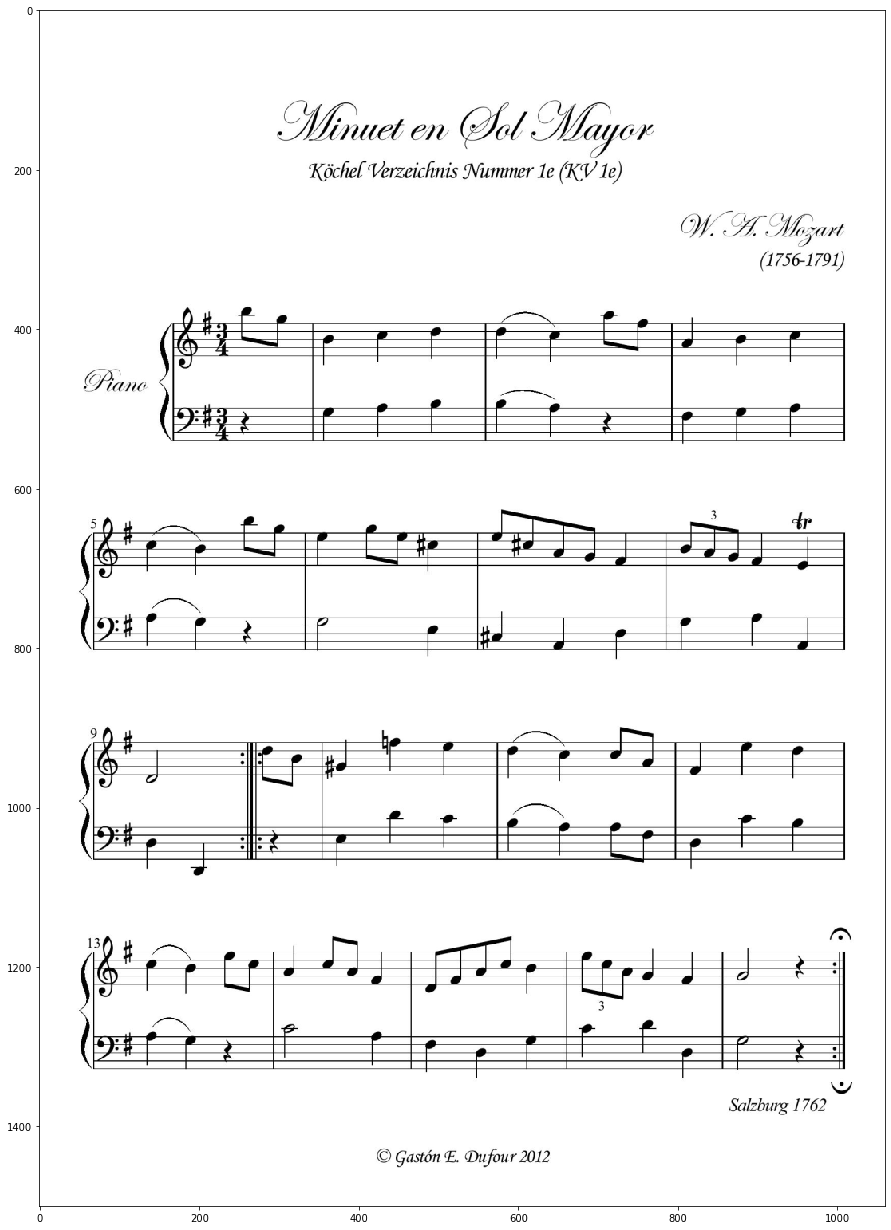

In [189]:
plt.figure(figsize = (22, 22))
plot_gray(data[3])

In [8]:
def get_contour(img):
    _, img = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
    contours, _ = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    return contours[np.argmax([cv.contourArea(c) for c in contours])]

In [9]:
symbol_paths = ['Quarter-Note/1.png', 'Eighth-Note/2.png', 'Sharp/1.png', 'Note-Heads/1.png', 'Note-Heads/3.png']
symbols = []
for s in symbol_paths:
    symbol = cv.imread(symbols_path + s, cv.IMREAD_GRAYSCALE)
    #_, symbol = cv.threshold(symbol, 127, 255, cv.THRESH_BINARY_INV)
    symbols.append(symbol)

In [ ]:
# Stare, momenty Hu
def measure(c):
    _, s, _ = cv.minAreaRect(c)
    return cv.contourArea(c) / ( s[0] * s[1] )

img = data.copy()
img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 15, 2)
contours, _ = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))
img3 = cv.cvtColor(data, cv.COLOR_GRAY2RGB)

for i, contour in enumerate(contours):
    if len(contour) > 2:
        val = [cv.matchShapes(contour, s, cv.CONTOURS_MATCH_I3, 0) for s in symbols]
        #val = [np.abs(measure(contour) - measure(s)) for s in symbols]
        print(val)
        color = [0, 0, 0]
        color[np.argmin(val)] = 255;
        cv.drawContours(img3, contours, i, color, 1)

plot_in_window(img3)

In [15]:
plt.figure(figsize = (22, 22))
plot_in_window(data)

<Figure size 1584x1584 with 0 Axes>

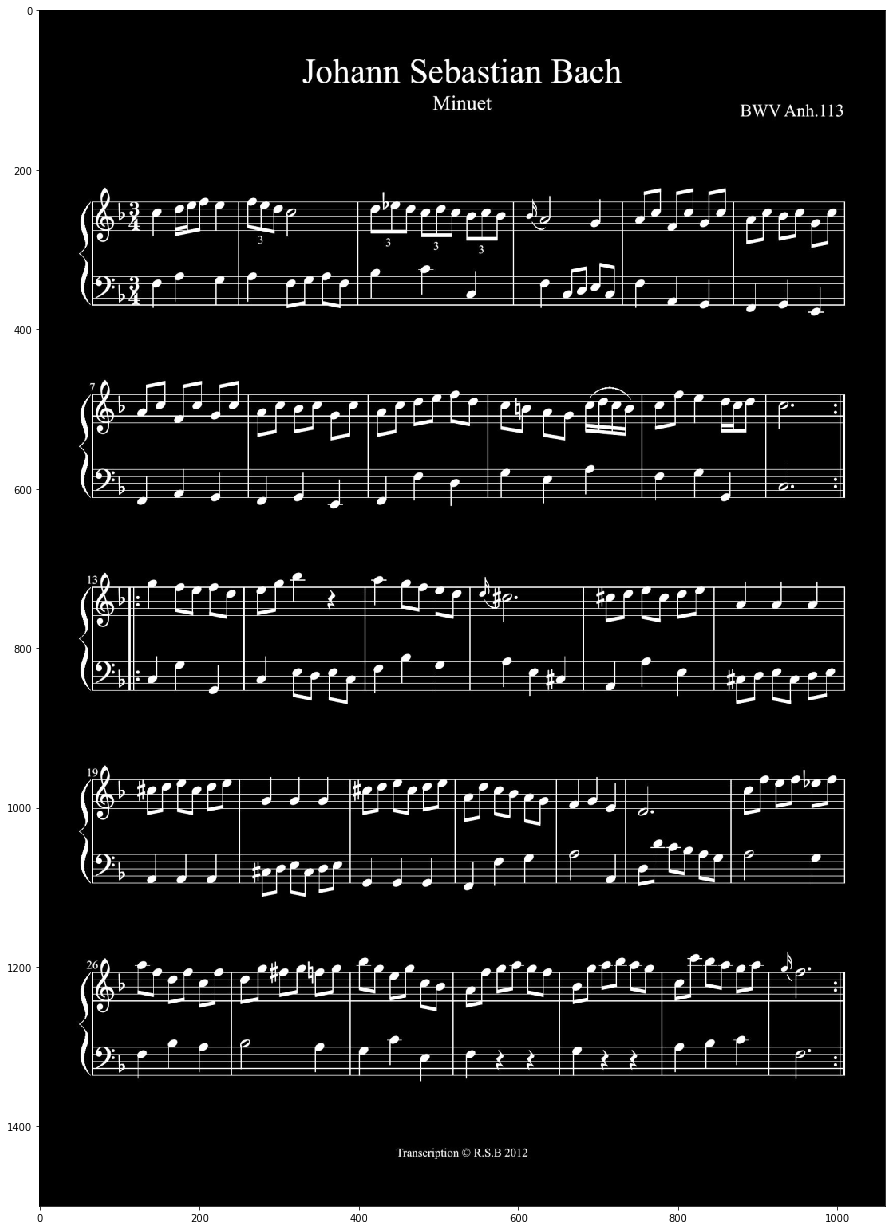

-1.0 57.0087712549569
-0.1 10.04987562112089
-0.06 37.054053967760396
-0.04 29.017236257093817
-0.03 79.02551254595136
0.0 41071.0
0.01 57.0087712549569
0.03 119.06725939233654
0.04 63.071697655444254
0.05 37.054053967760396
0.06 16.0312195418814
1.0 175.0
1500 1060 0.0 0.0


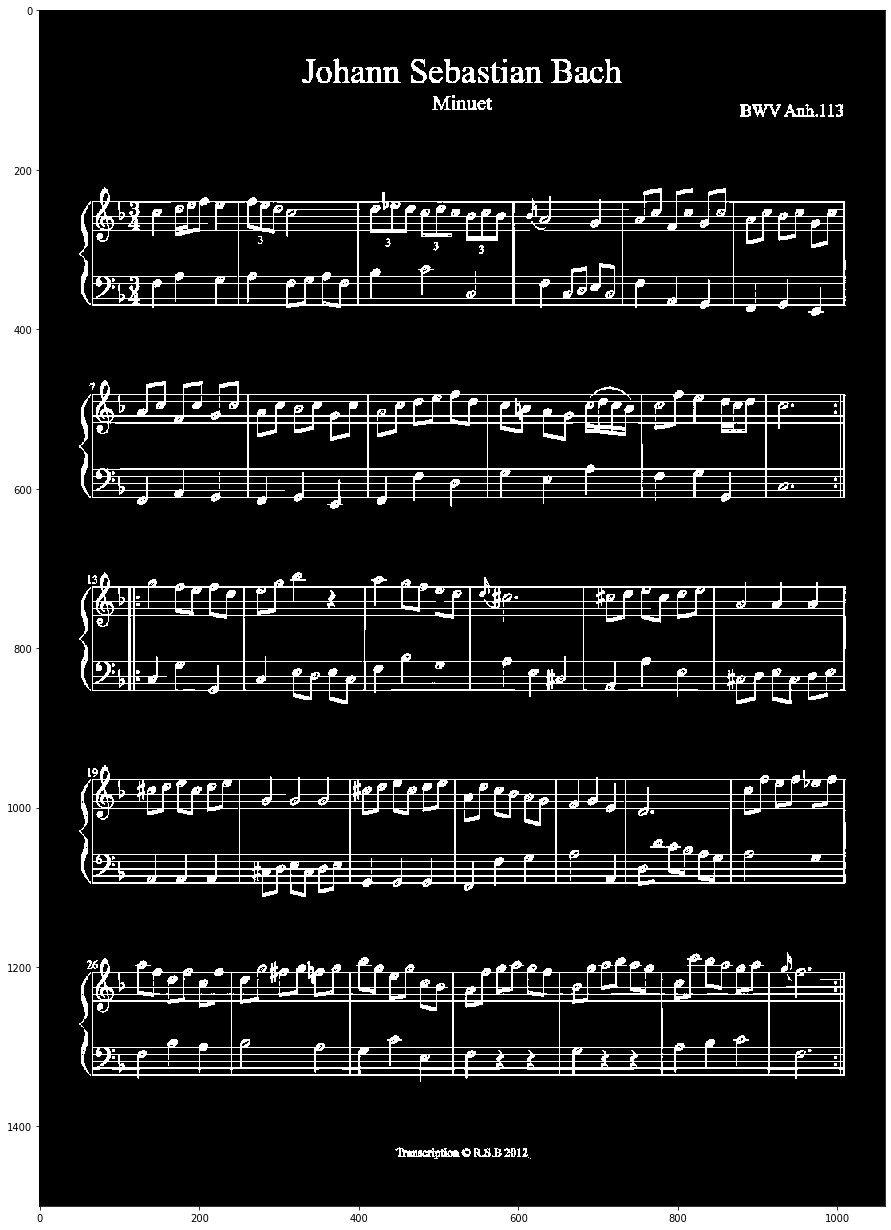

kolejno: [xbl, xbr], [ybl, ybr], [xel, xer], [yel, yer]
x - ixowa, y - ygrekowa, b - 1. linia, e - ostatnia linia, l - lewo, r - prawo
([62, 1019], [256.725, 250.0], [61, 624], [297.475, 286.0])
([62, 1020], [332.875, 344.0], [64, 1020], [378.125, 380.0])
([62, 1020], [498.5, 492.0], [61, 1019], [538.475, 527.0])
([62, 1019], [574.525, 585.0], [330, 1019], [621.0, 621.0])
([65, 1020], [734.3, 733.0], [61, 1020], [780.475, 769.0])
([62, 1019], [815.525, 827.0], [223, 1020], [863.0, 863.0])
([63, 1020], [976.225, 975.0], [61, 1019], [1022.0, 1005.4])
([62, 1020], [1057.525, 1068.0], [63, 1020], [1103.2, 1104.0])
([64, 1019], [1222.4, 1217.0], [63, 1019], [1250.275, 1252.0])
([61, 1019], [1298.175, 1310.0], [63, 1019], [1344.325, 1345.0])
liczba liń z pięcioliń: 52 (jak podzielna przez 5 to pewnie się zgadza)


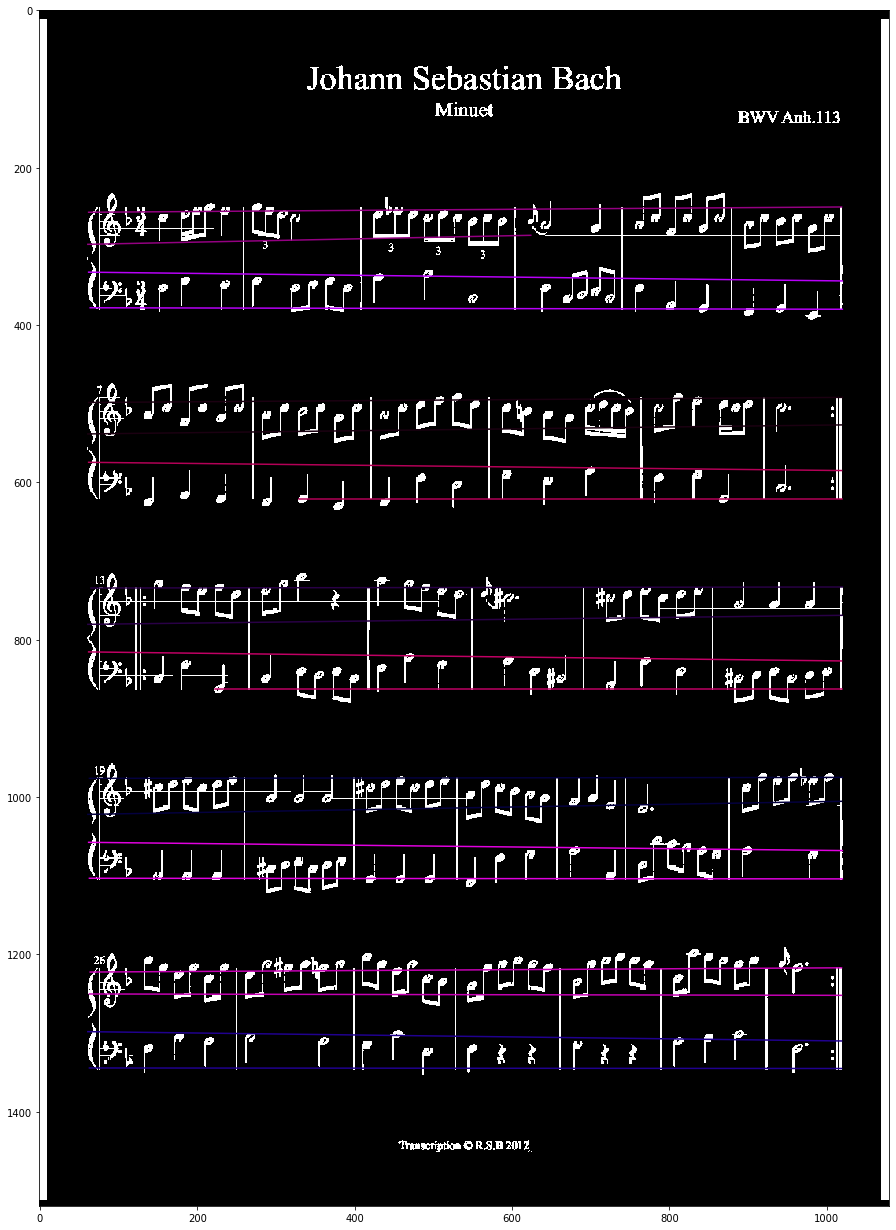

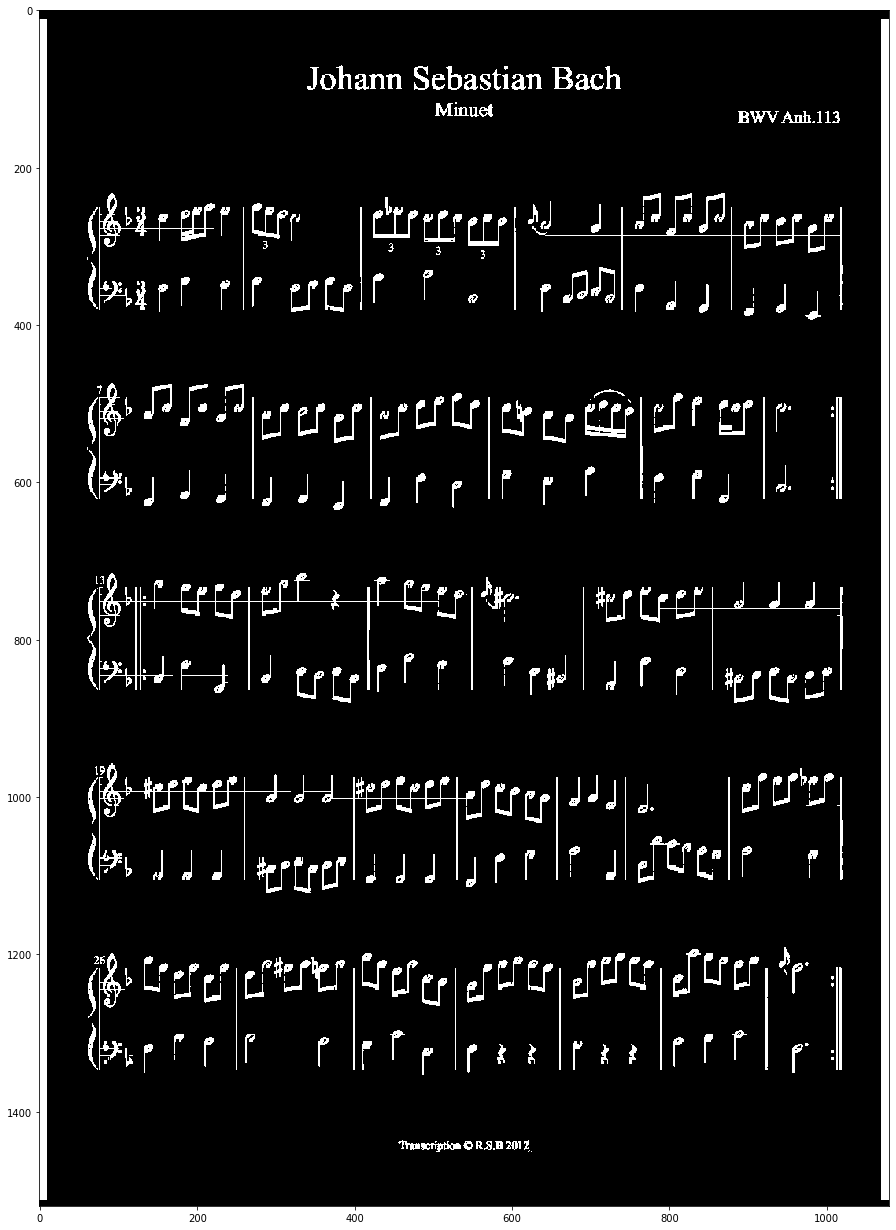

8.847752809524536


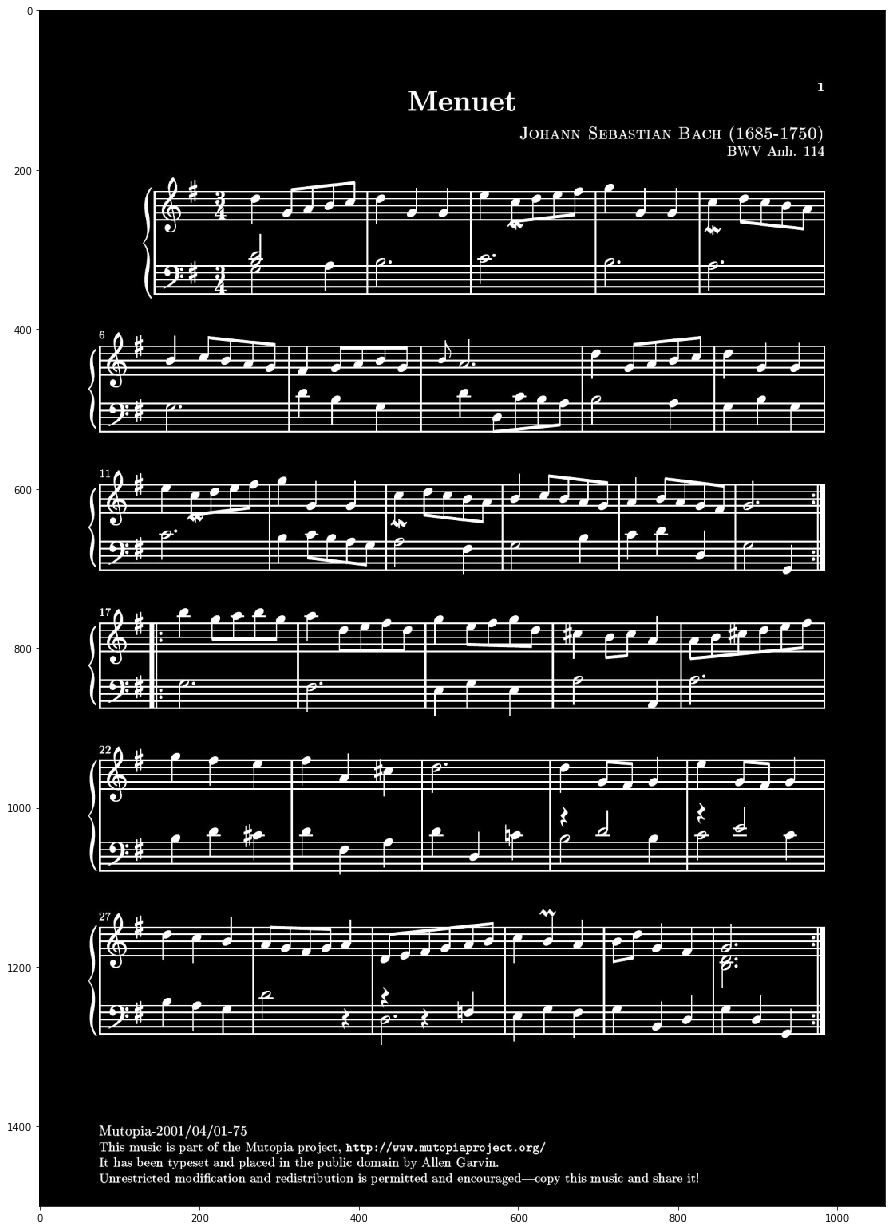

-1.0 15.033296378372908
-0.06 19.026297590440446
0.0 46254.0
0.01 57.0087712549569
0.02 35.014282800023196
0.06 15.033296378372908
0.09 10.04987562112089
0.11 17.11724276862369
1.0 359.0
1500 1060 0.0 0.0


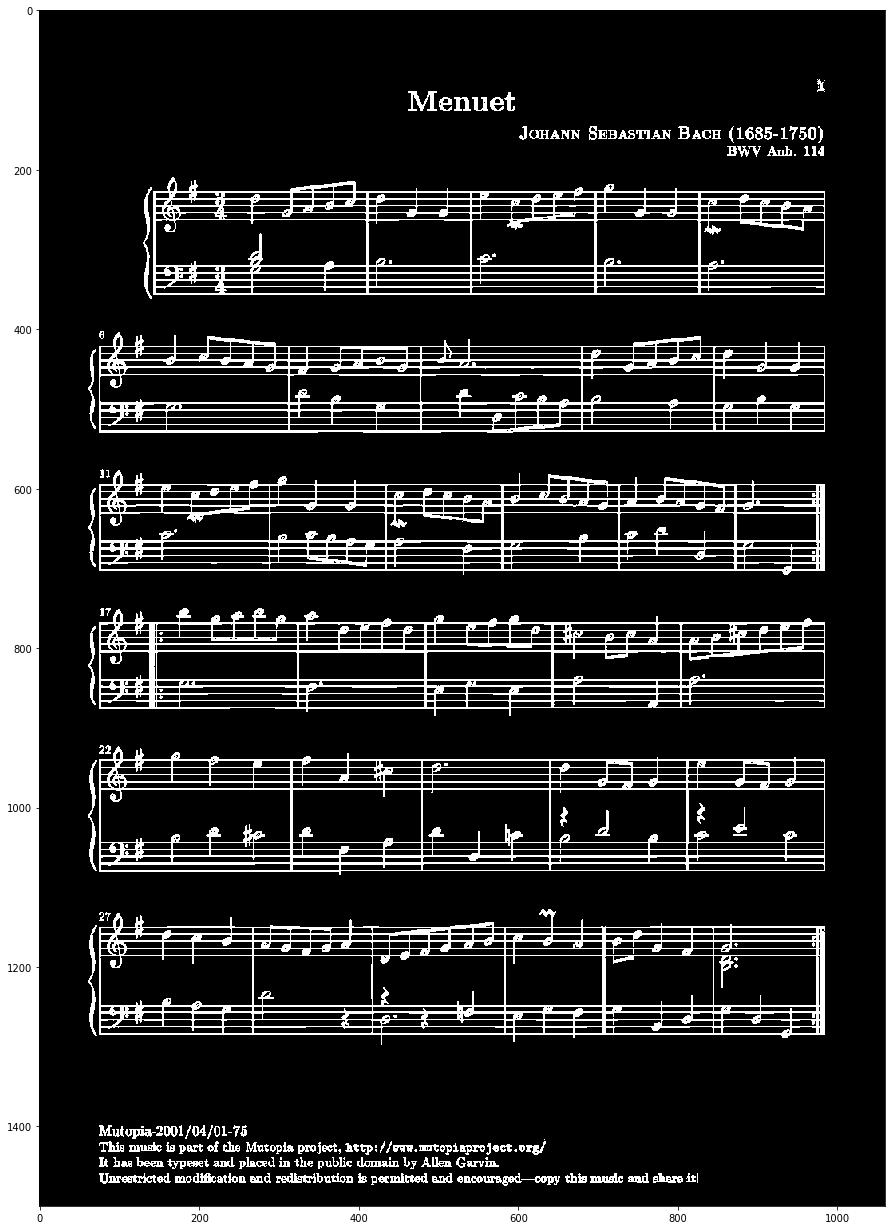

kolejno: [xbl, xbr], [ybl, ybr], [xel, xer], [yel, yer]
x - ixowa, y - ygrekowa, b - 1. linia, e - ostatnia linia, l - lewo, r - prawo
([143, 994], [242.6, 237.0], [143, 994], [271.825, 272.0])
([143, 994], [331.075, 330.0], [143, 994], [364.9, 365.0])
([75, 994], [437.75, 431.0], [75, 994], [465.925, 466.0])
([74, 551], [506.725, 501.725], [75, 994], [536.525, 537.0])
([75, 994], [611.15, 604.375], [86, 552], [627.425, 631.05])
([74, 994], [676.525, 675.0], [75, 543], [710.525, 712.0])
([75, 994], [784.7, 778.0], [96, 994], [812.025, 813.0])
([75, 994], [849.775, 849.0], [75, 994], [883.5, 884.0])
([74, 994], [950.425, 950.0], [74, 994], [985.825, 986.0])
([74, 994], [1054.0, 1053.0], [75, 994], [1087.625, 1088.0])
([75, 994], [1160.35, 1160.0], [74, 994], [1194.9, 1195.0])
([75, 994], [1259.0, 1258.0], [75, 994], [1292.9, 1293.0])
liczba liń z pięcioliń: 71 (jak podzielna przez 5 to pewnie się zgadza)


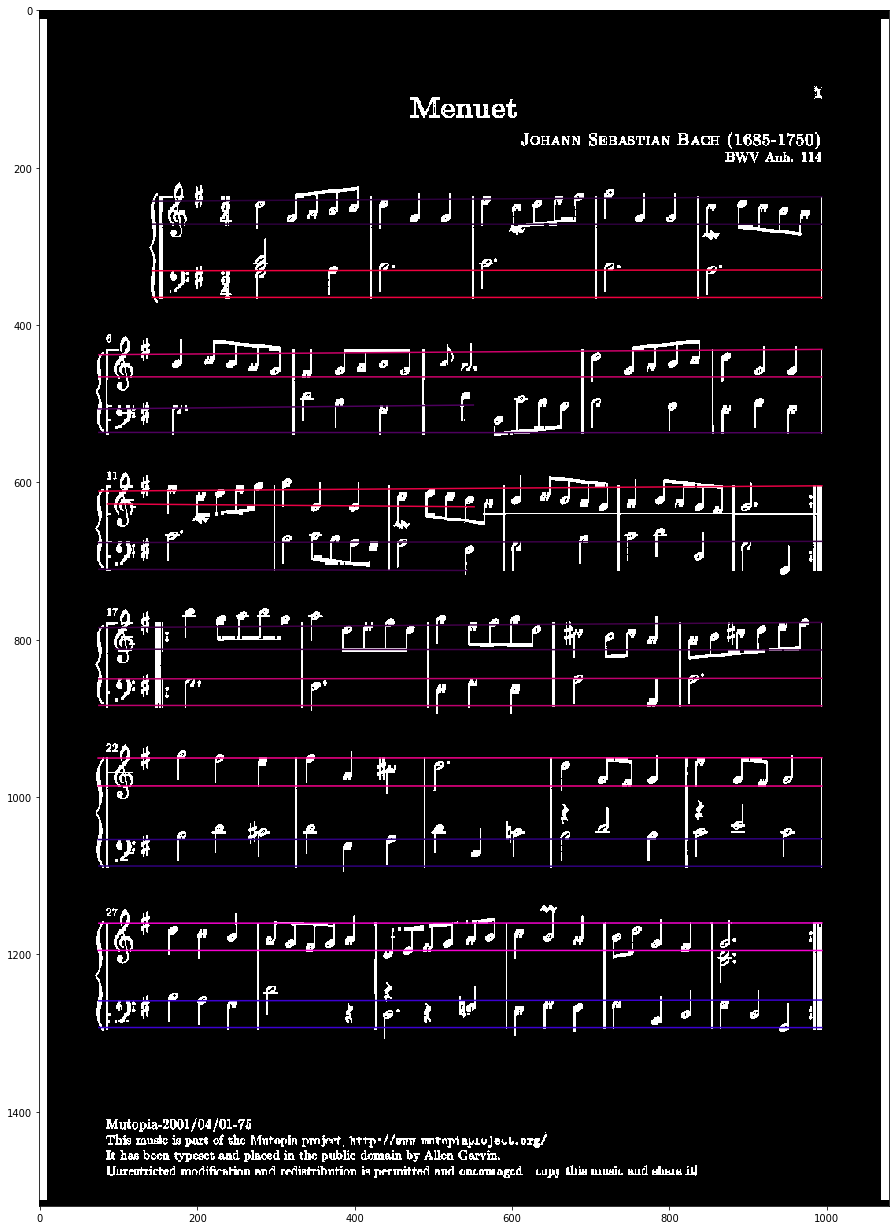

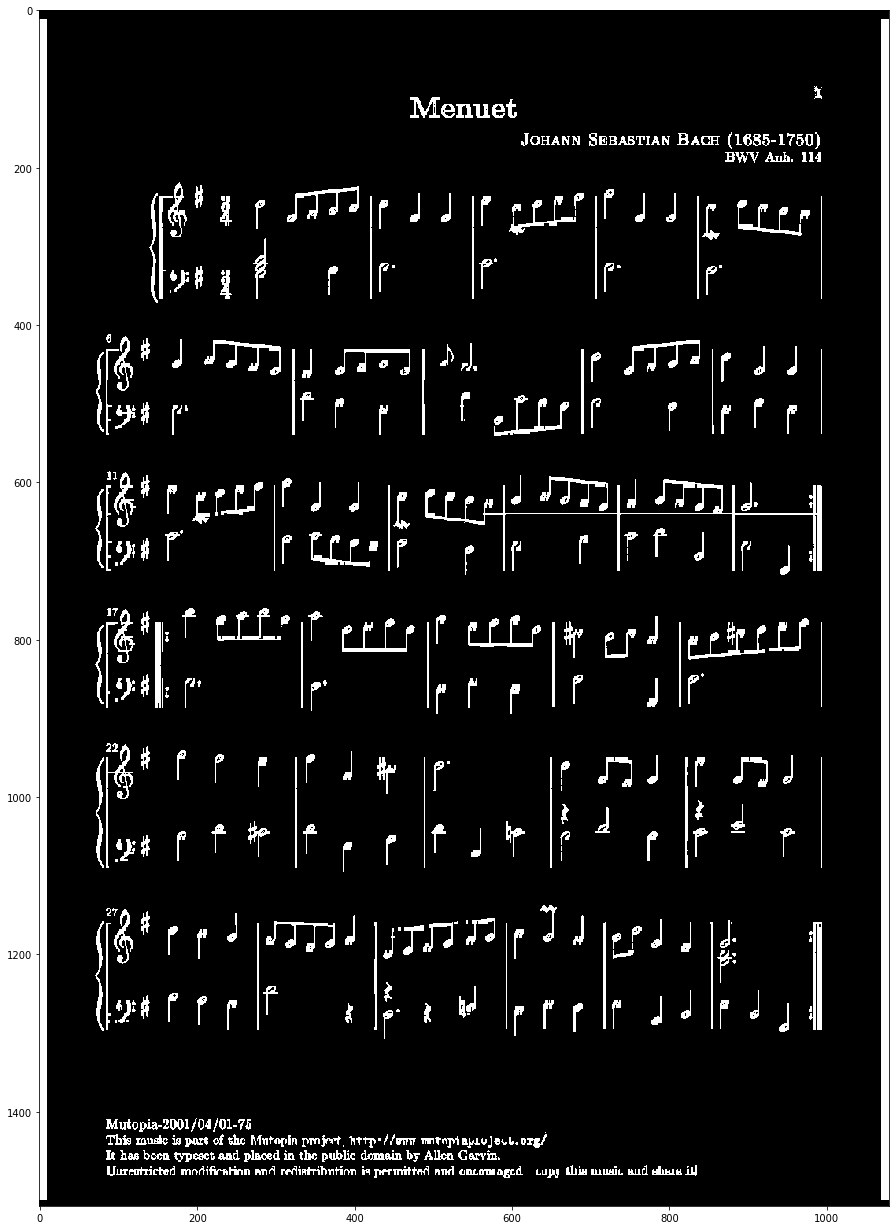

9.728118896484375


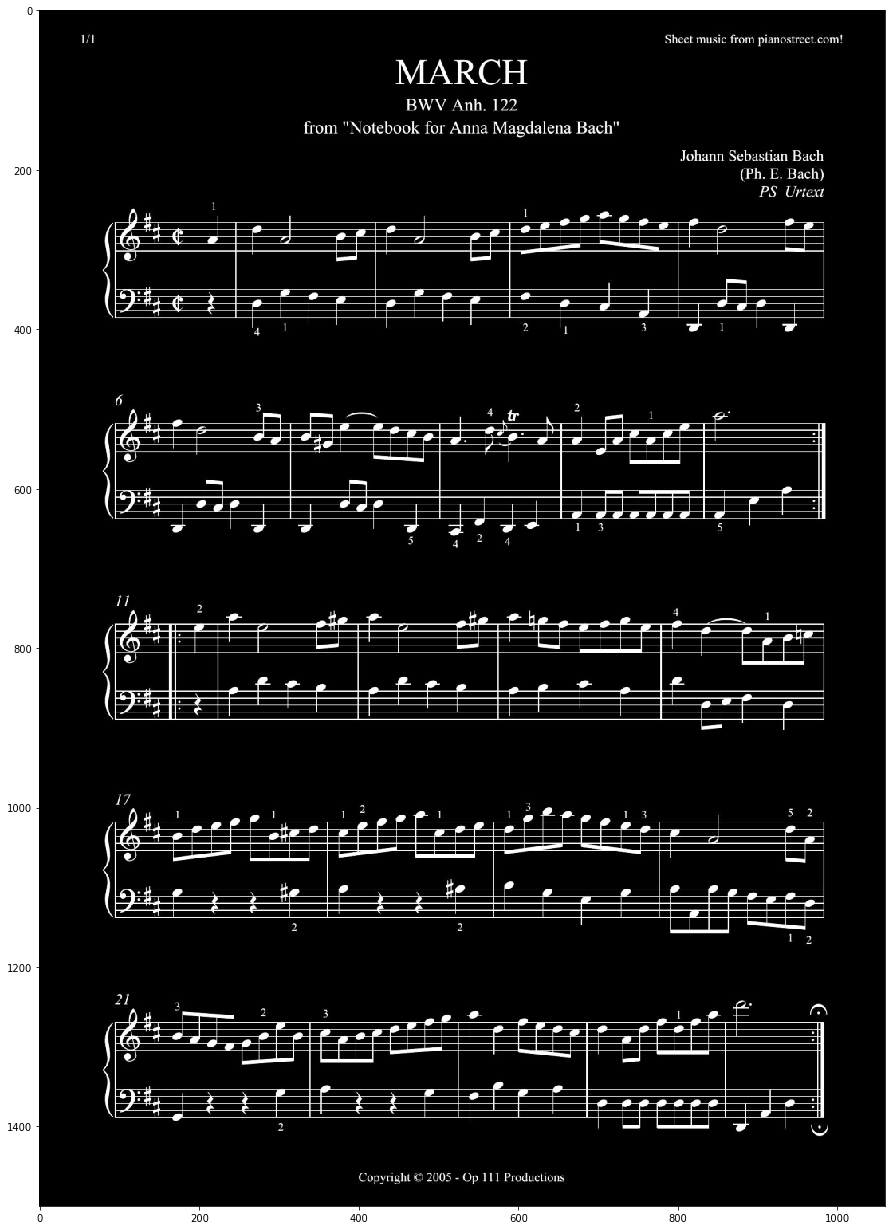

-0.12 18.110770276274835
-0.1 33.13608305156178
-0.09 12.041594578792296
-0.07 15.033296378372908
-0.05 24.020824298928627
-0.04 29.017236257093817
-0.03 133.03402266340427
0.0 38077.0
0.02 76.02638425822332
0.03 32.01562118716424
0.04 24.020824298928627
0.09 11.045361017187261
1.0 86.0
1500 1061 0.0 0.0


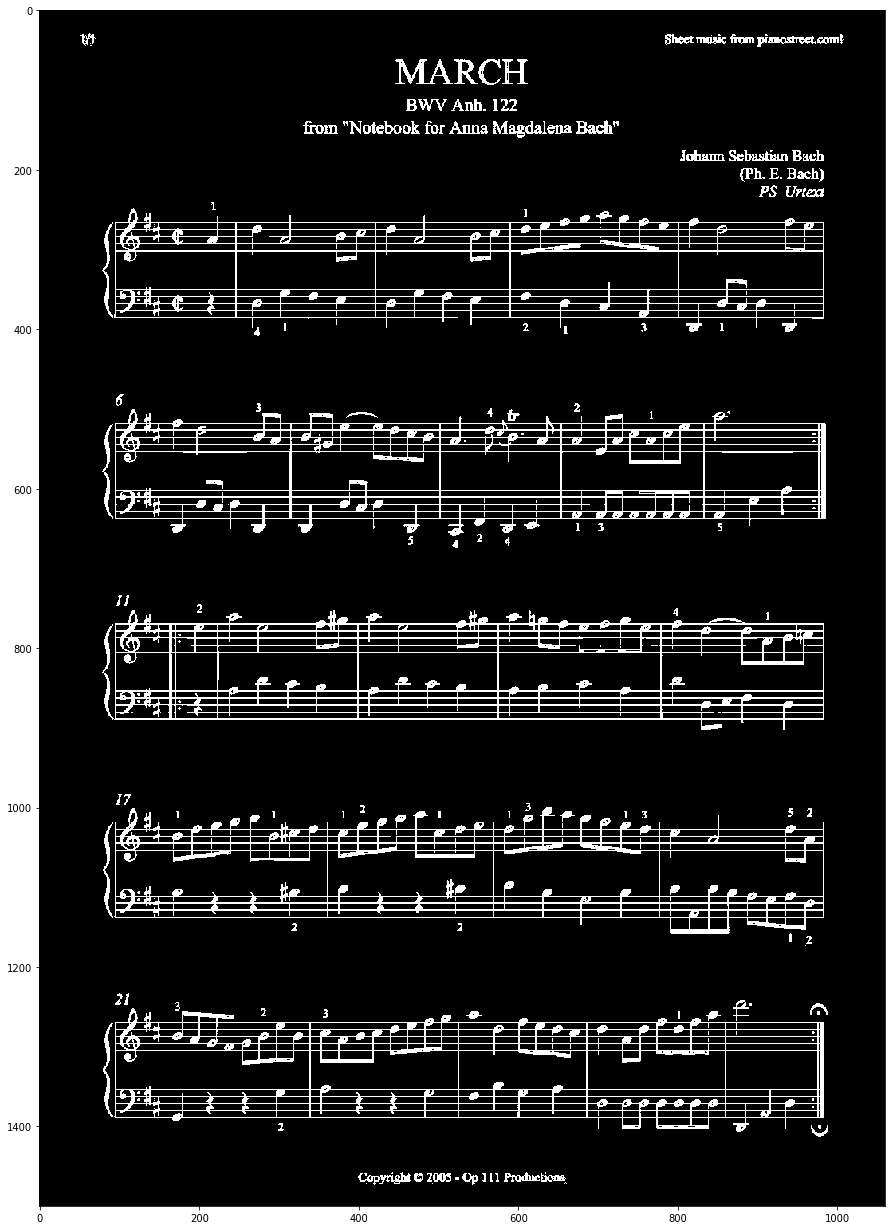

kolejno: [xbl, xbr], [ybl, ybr], [xel, xer], [yel, yer]
x - ixowa, y - ygrekowa, b - 1. linia, e - ostatnia linia, l - lewo, r - prawo
([95, 994], [276.35, 276.0], [90, 994], [318.425, 311.0])
([106, 994], [360.0, 360.0], [93, 994], [386.375, 386.0])
([94, 540], [534.125, 528.0], [93, 996], [562.775, 563.0])
([93, 996], [613.85, 612.0], [537, 996], [647.0, 647.0])
([95, 994], [779.9, 779.0], [93, 994], [814.775, 815.0])
([93, 994], [865.425, 863.0], [95, 994], [897.775, 898.0])
([95, 994], [1028.45, 1028.0], [93, 994], [1062.9, 1063.0])
([93, 994], [1119.375, 1112.0], [95, 994], [1146.625, 1147.0])
([94, 994], [1287.725, 1280.0], [93, 994], [1313.7, 1314.0])
([93, 994], [1364.8, 1363.0], [95, 994], [1397.625, 1398.0])
liczba liń z pięcioliń: 57 (jak podzielna przez 5 to pewnie się zgadza)


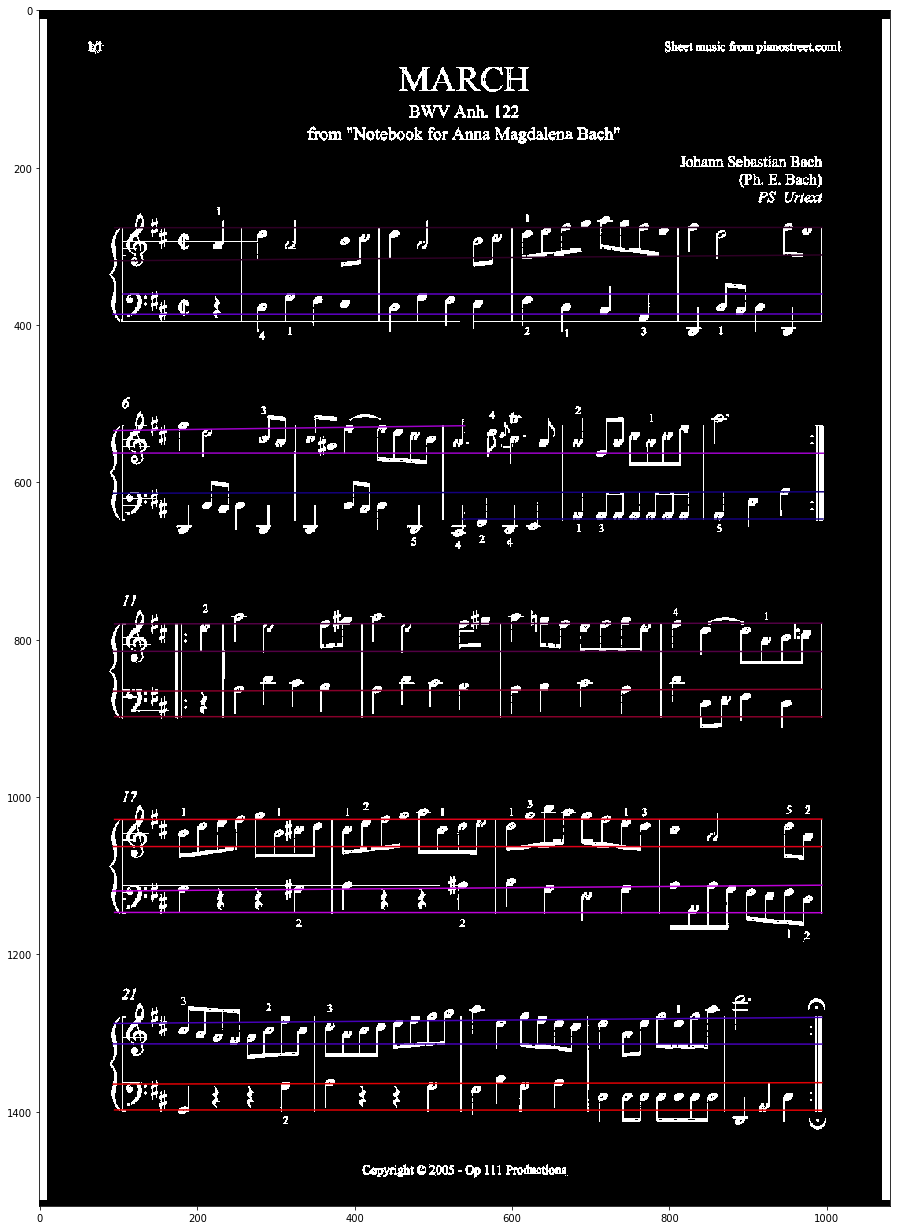

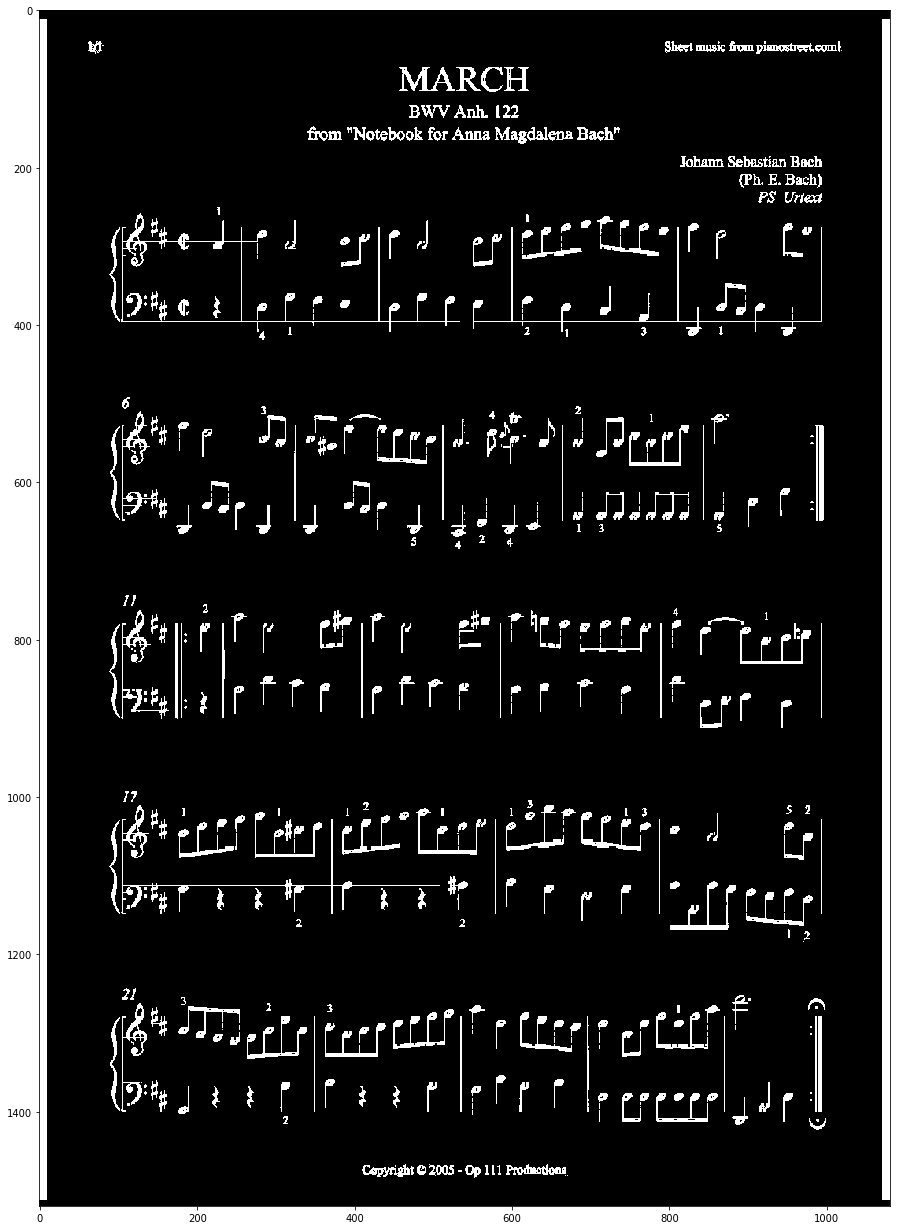

8.434107780456543


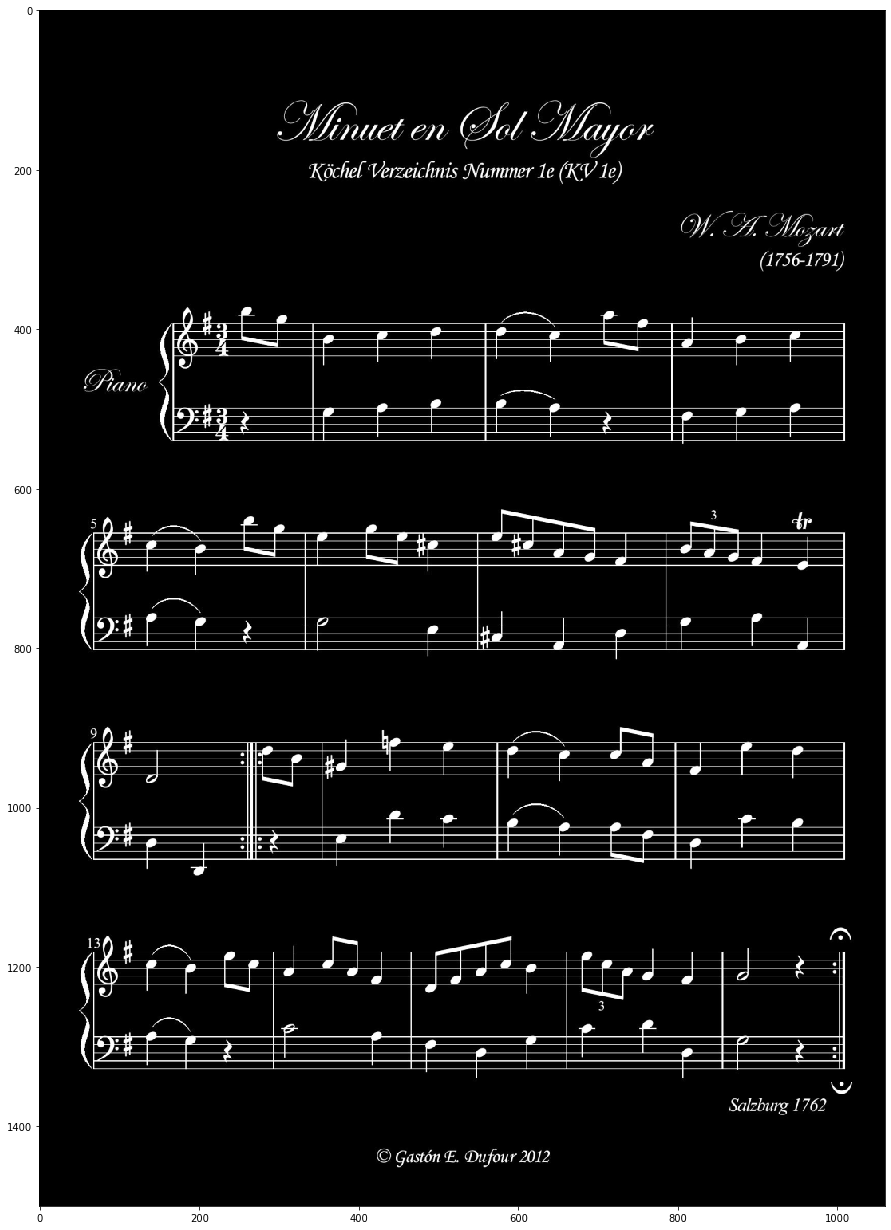

-0.04 29.017236257093817
-0.02 57.0087712549569
0.0 29932.0
0.01 57.0087712549569
0.05 37.054053967760396
1.0 56.0
1500 1060 0.0 0.0


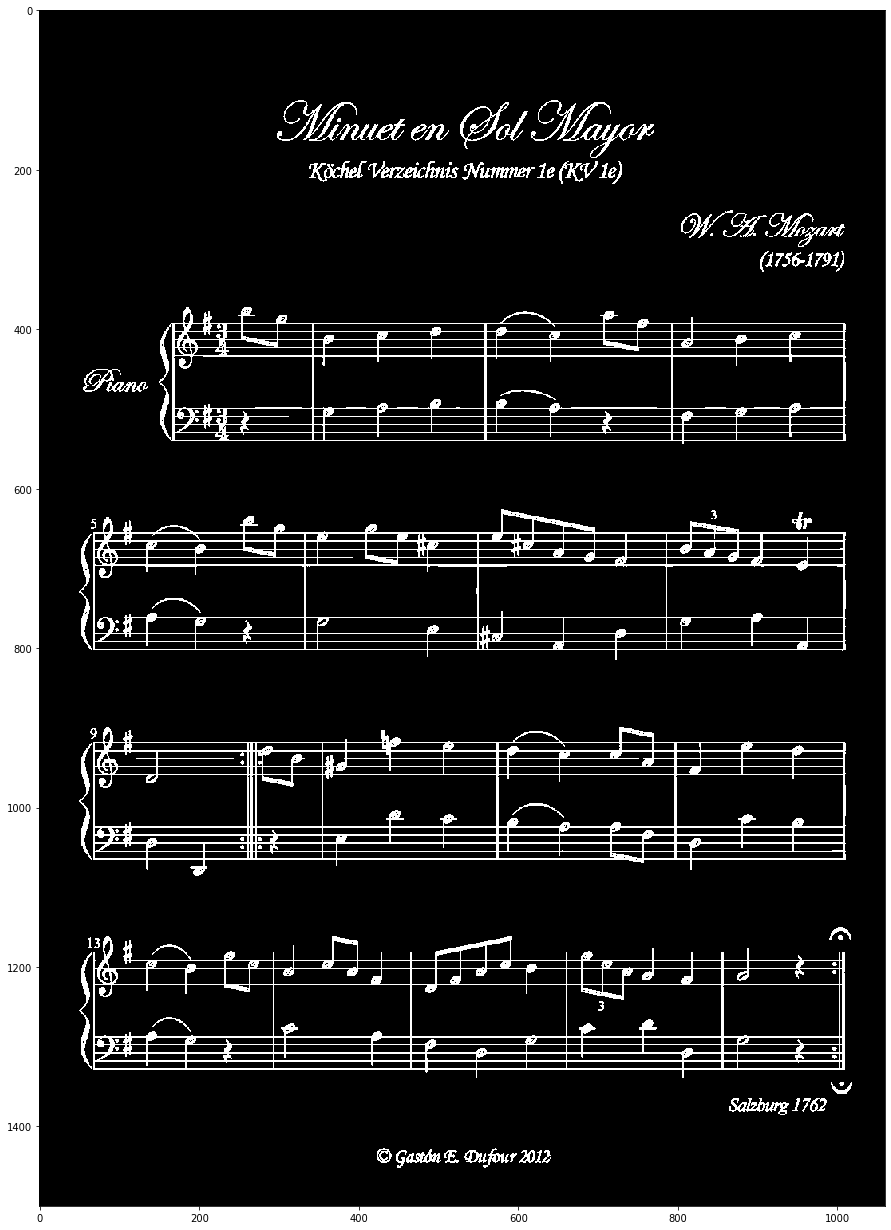

kolejno: [xbl, xbr], [ybl, ybr], [xel, xer], [yel, yer]
x - ixowa, y - ygrekowa, b - 1. linia, e - ostatnia linia, l - lewo, r - prawo
([164, 1020], [410.1, 403.0], [178, 1020], [441.85, 444.0])
([163, 1020], [509.0, 508.25], [165, 1020], [547.975, 549.0])
([63, 1020], [673.025, 665.0], [420, 1019], [700.575, 696.95])
([63, 1020], [771.275, 772.0], [64, 1020], [810.475, 812.0])
([64, 1020], [929.525, 928.0], [79, 1020], [966.425, 968.0])
([63, 1020], [1033.525, 1034.0], [64, 602], [1192.7, 1178.3])
([533, 1019], [1201.0, 1201.0], [63, 1019], [1233.725, 1231.0])
([63, 1019], [1296.525, 1297.0], [63, 1019], [1335.125, 1337.0])
liczba liń z pięcioliń: 44 (jak podzielna przez 5 to pewnie się zgadza)


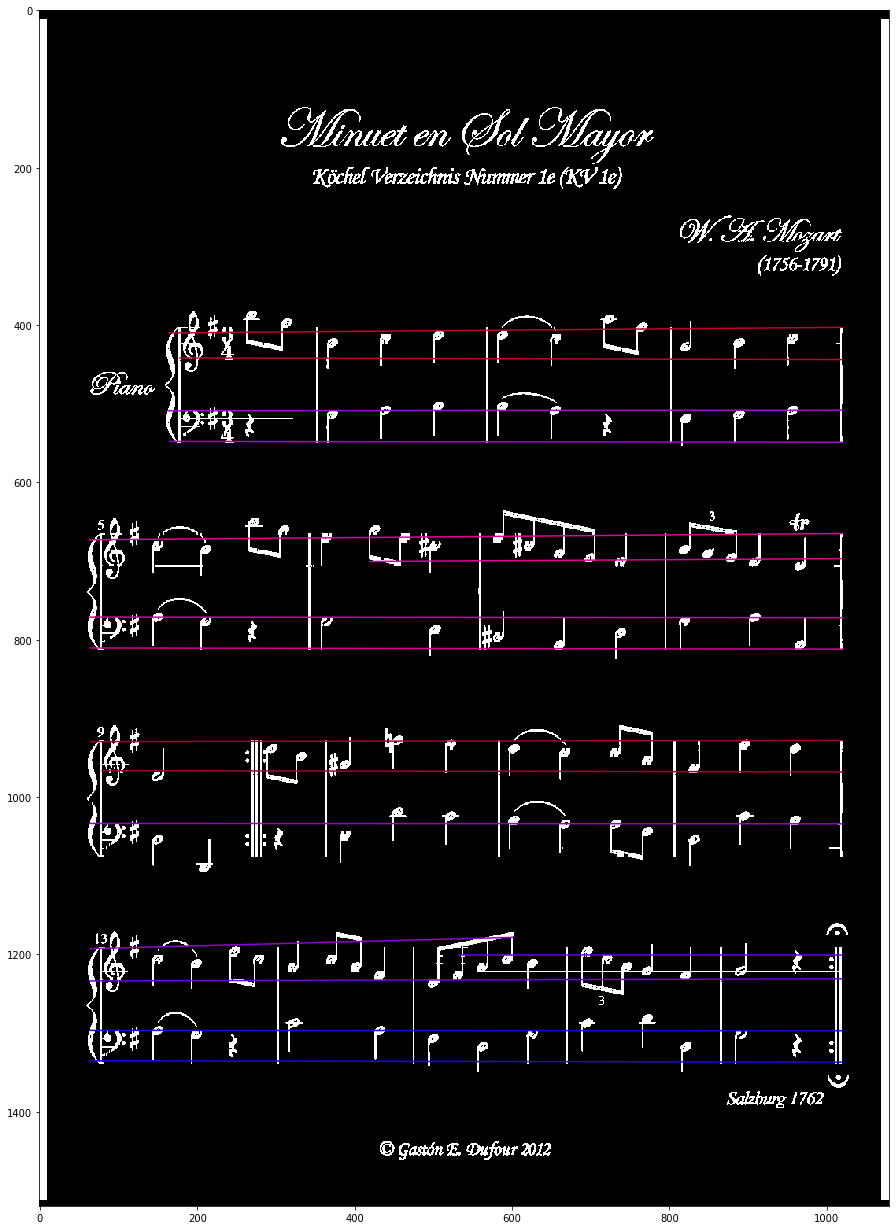

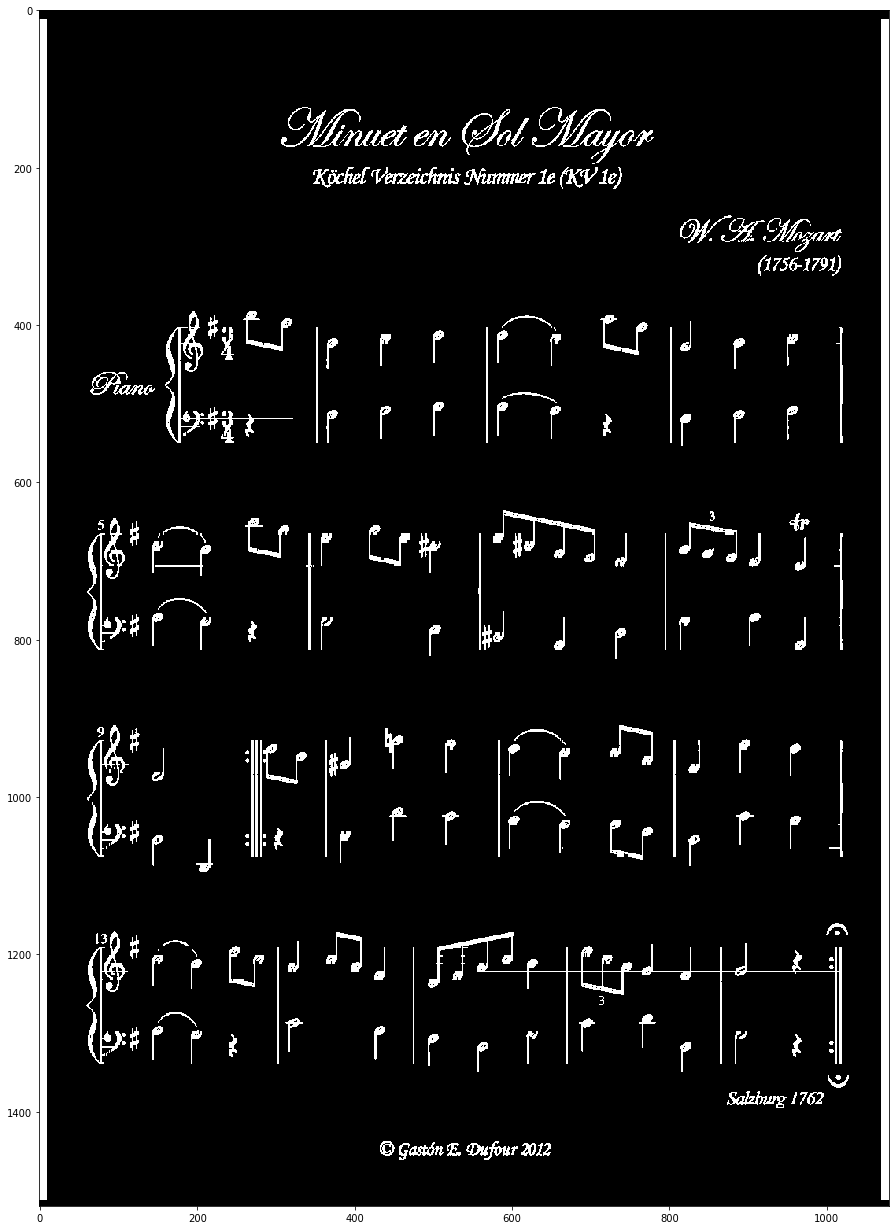

6.728469610214233


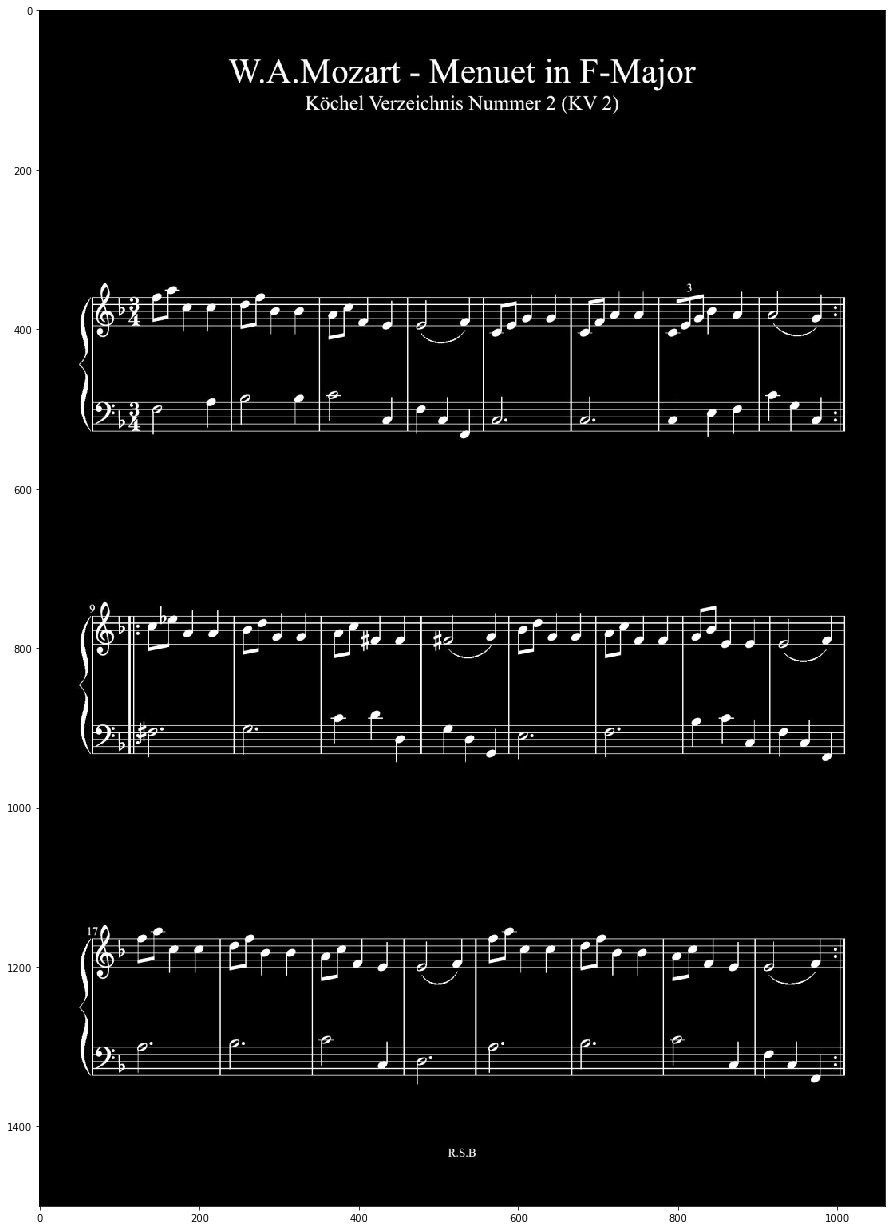

-0.07 15.033296378372908
0.0 18911.0
0.03 29.017236257093817
0.04 20.024984394500787
0.05 18.027756377319946
1.0 56.0
1500 1060 0.0 0.0


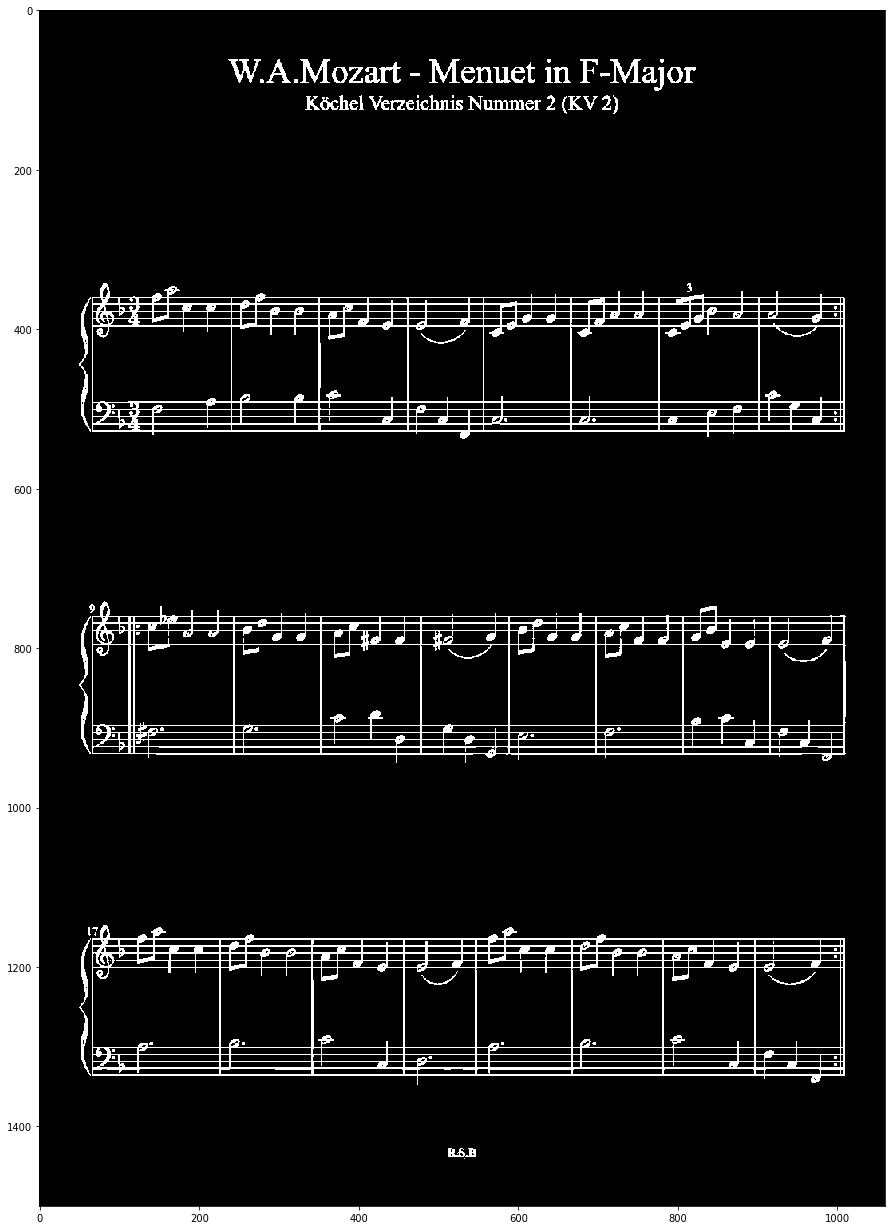

kolejno: [xbl, xbr], [ybl, ybr], [xel, xer], [yel, yer]
x - ixowa, y - ygrekowa, b - 1. linia, e - ostatnia linia, l - lewo, r - prawo
([66, 1019], [377.85, 370.0], [63, 1019], [410.975, 405.0])
([77, 1019], [502.0, 501.0], [67, 1019], [536.9, 537.0])
([67, 1020], [770.15, 770.0], [63, 1020], [811.55, 805.0])
([77, 1020], [907.0, 907.0], [66, 1020], [941.775, 942.0])
([69, 1019], [1175.0, 1174.0], [529, 1019], [1209.85, 1210.0])
([77, 1019], [1310.0, 1310.0], [110, 1019], [1345.0, 1345.0])
liczba liń z pięcioliń: 35 (jak podzielna przez 5 to pewnie się zgadza)


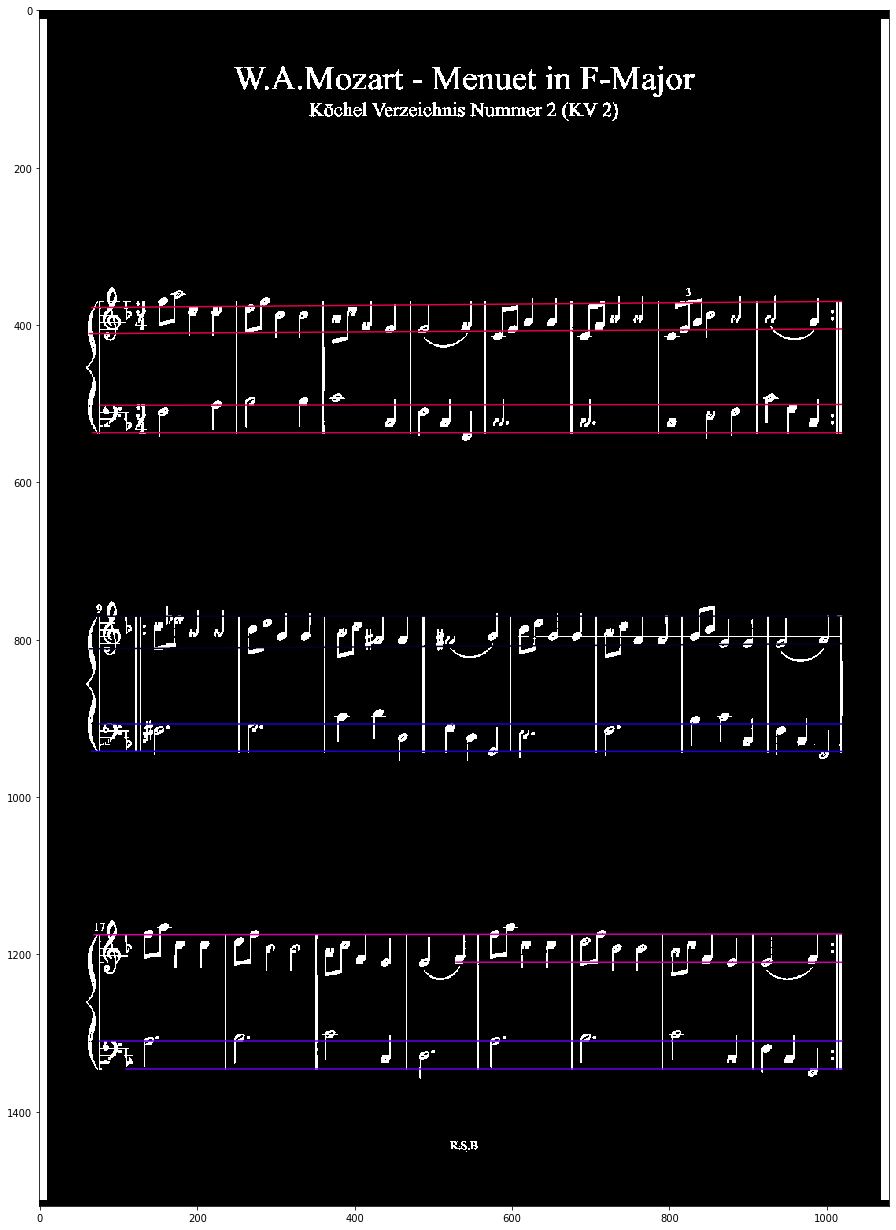

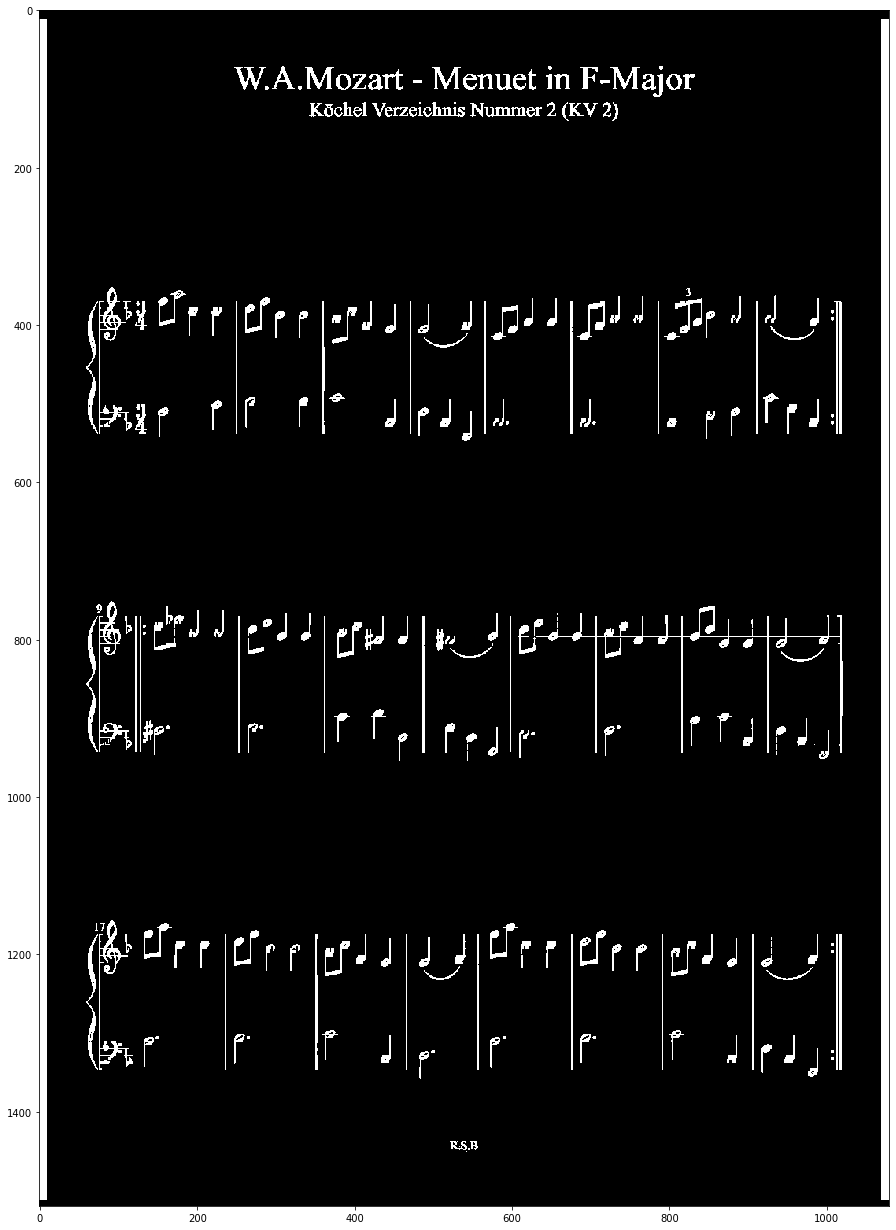

6.67826771736145


In [190]:
preprocessed_data = []
for d in data:
    preprocessed_data.append(remove_staff_lines(d))

In [40]:
staff_lines

[([1, 1144], [1.0, 1.0], [54, 619], [17.575, 24.0]),
 ([1, 1144], [164.0, 139.0], [491, 1144], [177.15, 119.0]),
 ([115, 634], [282.675, 270.0], [111, 1116], [325.25, 315.45]),
 ([113, 1118], [373.0, 372.675], [113, 573], [407.0, 409.0]),
 ([37, 1144], [528.525, 528.65], [32, 1144], [573.8, 565.85]),
 ([34, 1144], [616.425, 610.7], [35, 1144], [652.5, 654.175]),
 ([40, 1112], [776.275, 775.725], [510, 1109], [795.275, 805.0]),
 ([24, 1111], [862.65, 858.85], [37, 1110], [895.0, 894.0]),
 ([428, 722], [956.2, 958.425], [408, 709], [968.975, 960.95]),
 ([40, 1110], [1035.85, 1028.375], [37, 1110], [1071.725, 1064.15]),
 ([38, 1109], [1131.725, 1127.0], [42, 1125], [1166.225, 1163.0]),
 ([1, 833], [1215.175, 1202.775], [429, 826], [1219.075, 1210.3]),
 ([571, 1110], [1276.0, 1276.175], [569, 1109], [1313.0, 1312.0]),
 ([40, 1113], [1369.95, 1373.45], [1, 1113], [1412.325, 1410.625])]

In [80]:
staff_lines[4][3][0] - staff_lines[3][1][0]

29.799999999999955

In [81]:
(30)/4 * 1.25

9.375

In [74]:
plot_in_window(data)

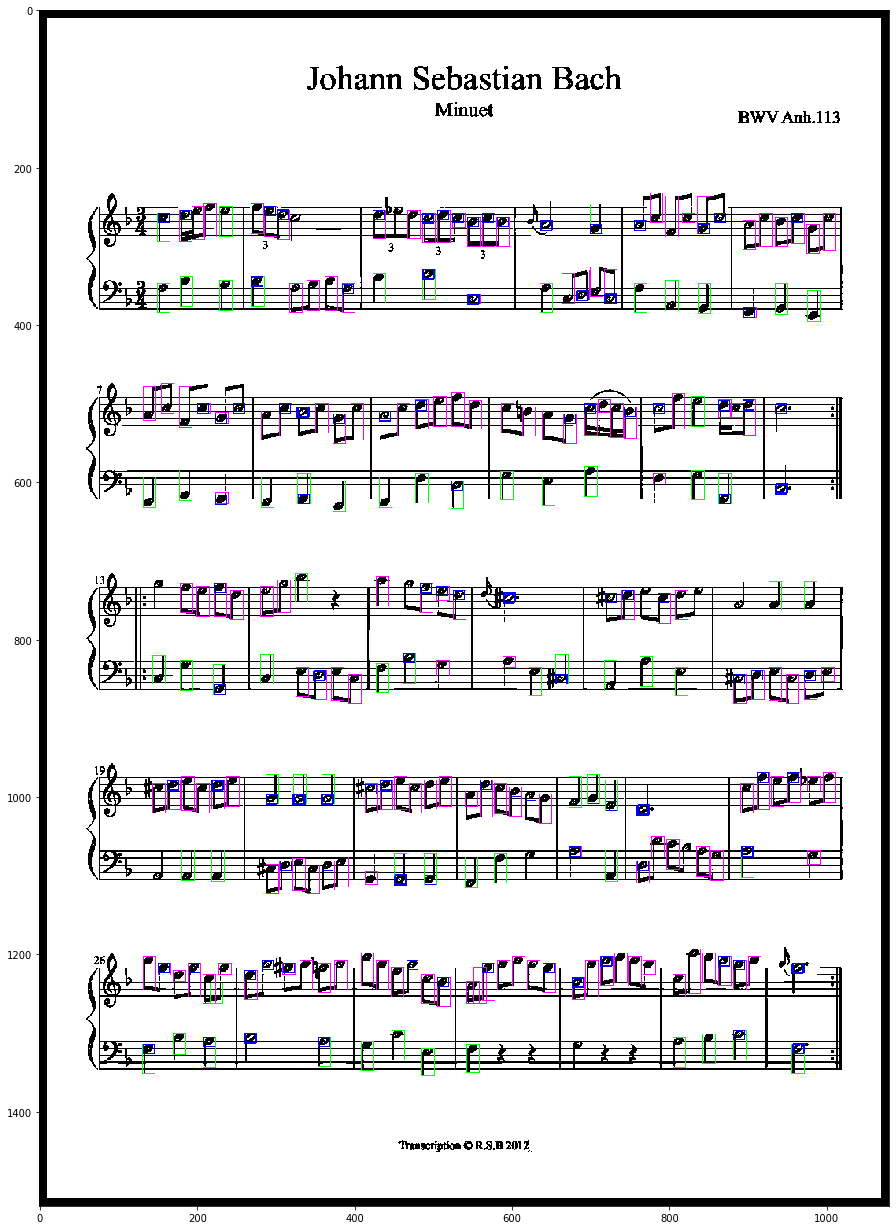

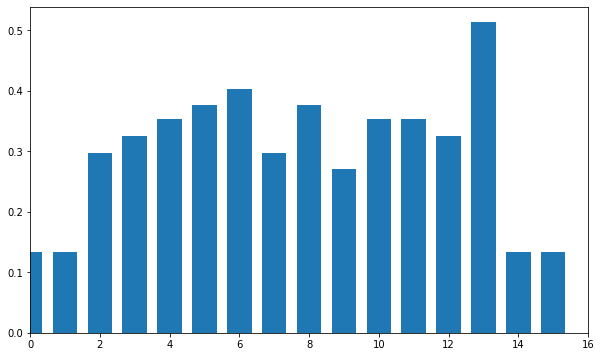

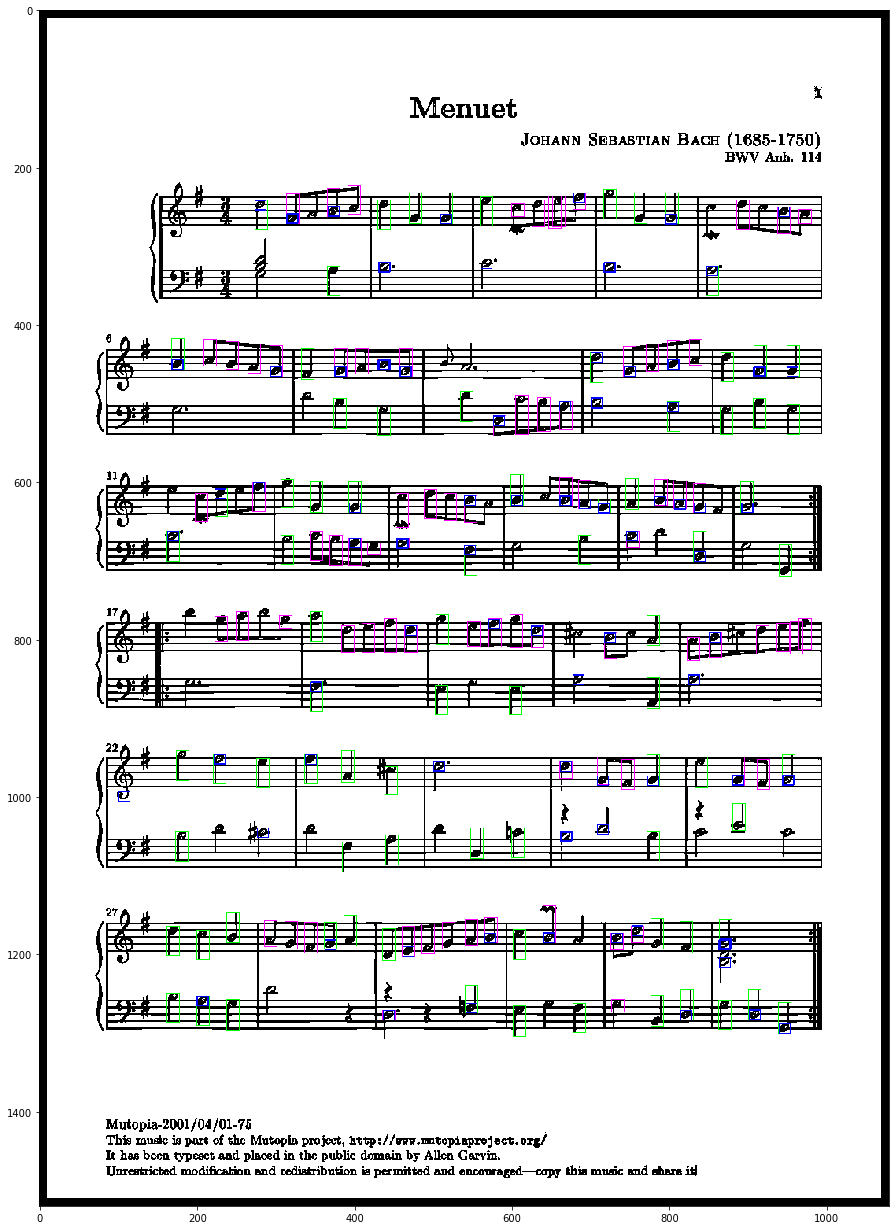

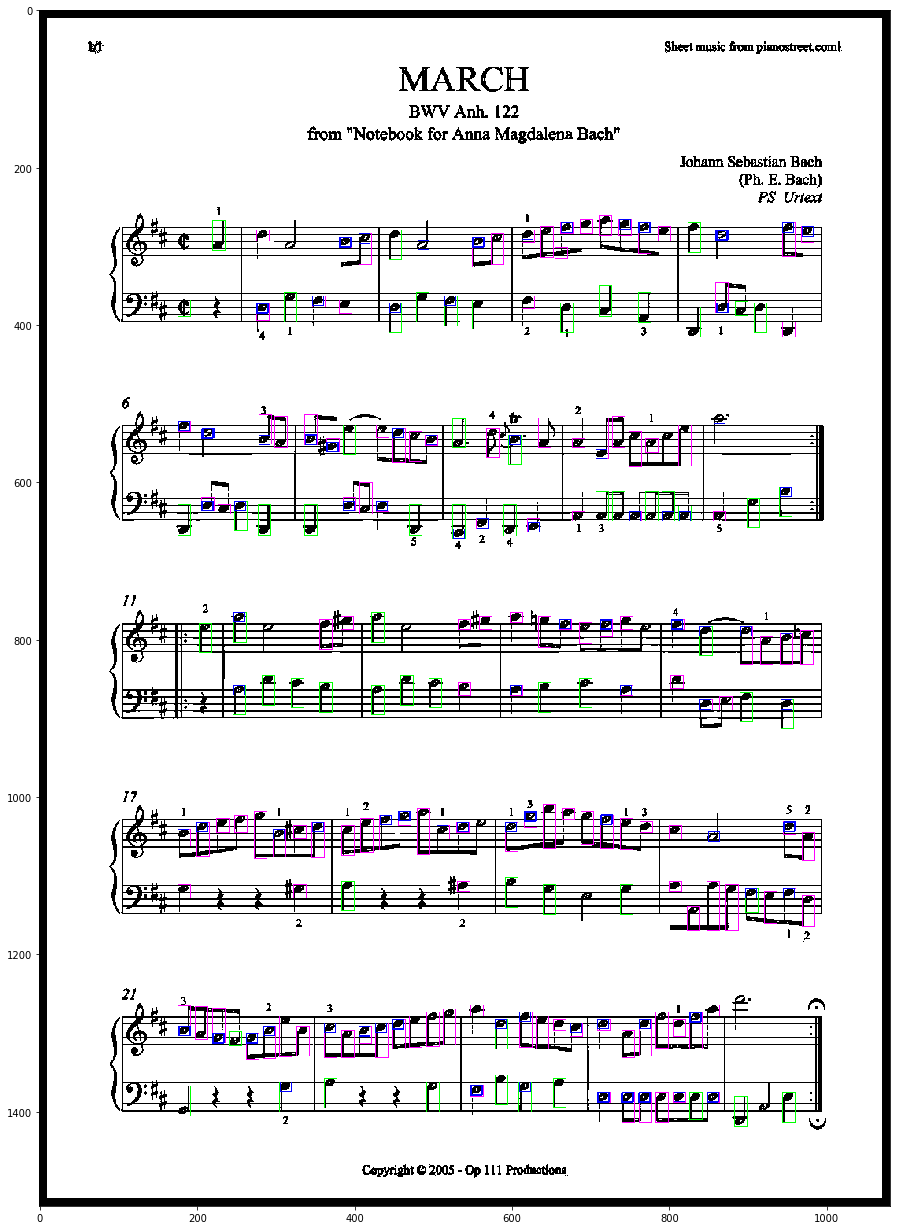

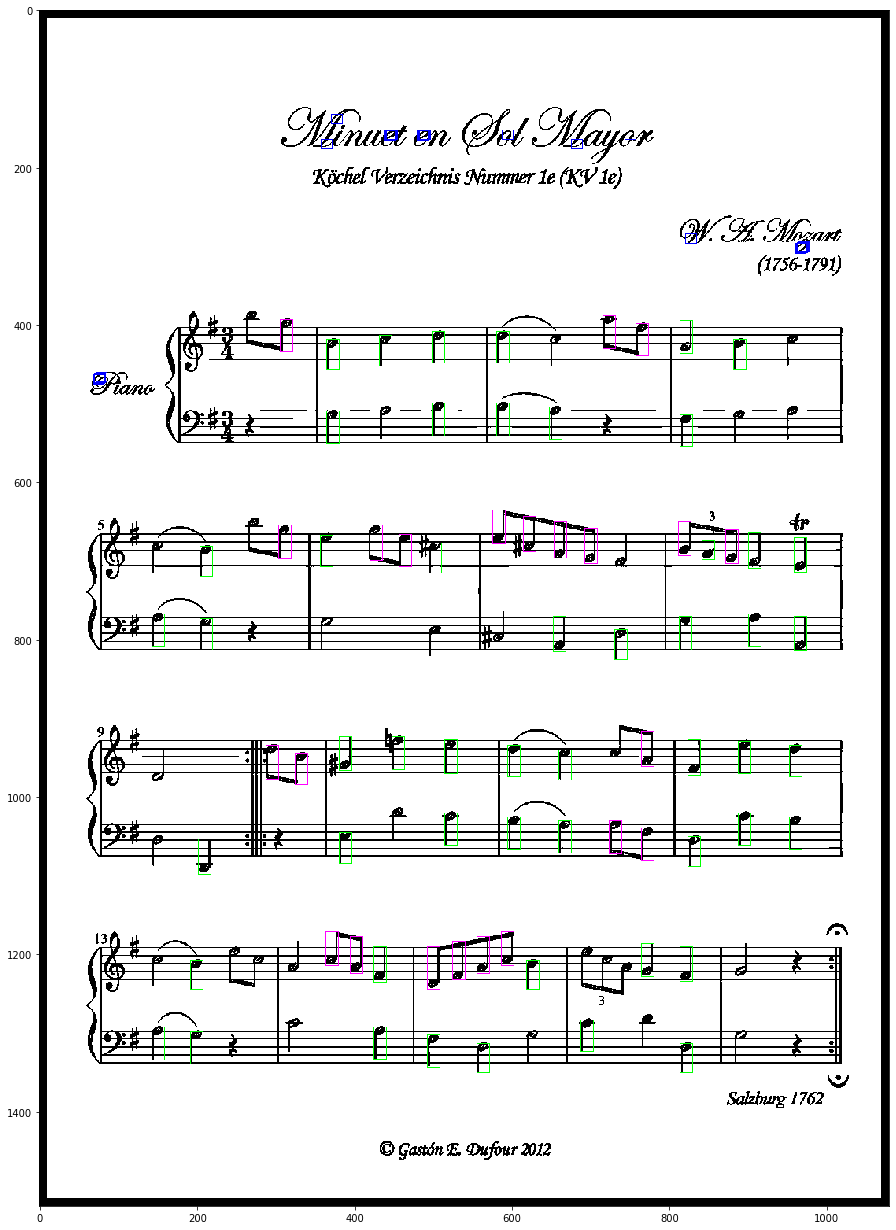

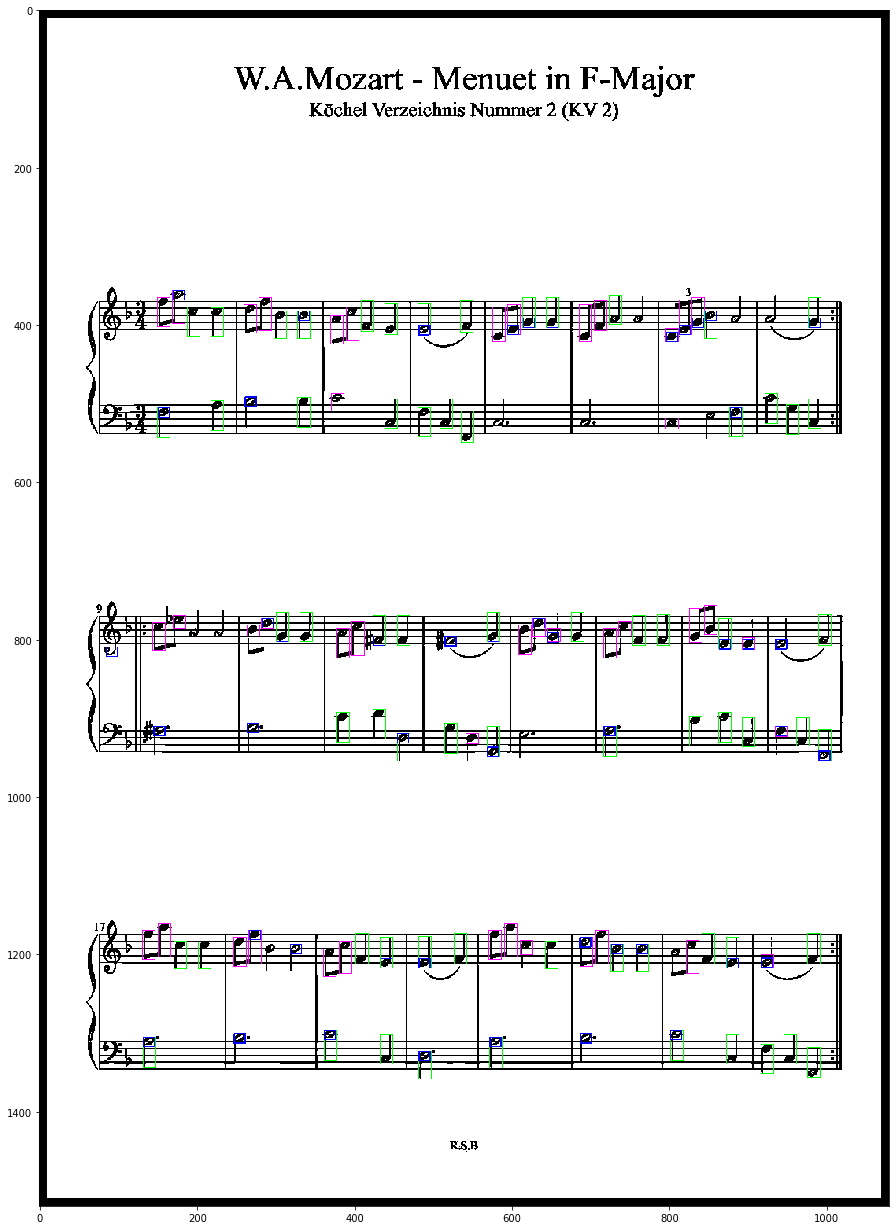

In [192]:
#staff_height = 37
#staff_height = staff_lines[3][3][0] - staff_lines[3][1][0]
for pd in preprocessed_data:
    img_color = detect_notes(pd[0], pd[1], 37)
    plt.figure(figsize = (22, 22))
    plot_color(img_color[:, :, (2, 1, 0)])

In [176]:
plot_in_window(img_color)

In [164]:
def detect_notes(img, img_original, staff_height):
    # Resize symbols
    note_height = staff_height/4 * 1.25
    #staff_width = 10

    rs_factor = note_height / symbols[3].shape[0]
    note_head = cv.resize(~symbols[3], None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
    #_, note_head = cv.threshold(note_head, 127, 255, cv.THRESH_BINARY_INV)

    rs_factor = note_height / symbols[4].shape[0]
    note_head_empty = cv.resize(~symbols[4], None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
    #_, note_head_empty = cv.threshold(note_head_empty, 127, 255, cv.THRESH_BINARY_INV)
    
    img_color = cv.cvtColor(img_original, cv.COLOR_GRAY2RGB)

    result = cv.matchTemplate(img, note_head, method = cv.TM_SQDIFF_NORMED)
    th = 0.32

    # Remove duplicate detections
    h, w = note_head.shape
    noteheads = np.nonzero(result < th)
    detected_noteheads = set()
    for x, y in zip(noteheads[1], noteheads[0]):
        x = max(0, x - w//2)
        y = max(0, y - h//2)
        #Remove multiple detections
        neighborhood = result[y:(y + h), x:(x + w)]
        note_y, note_x = np.unravel_index(np.argmin(neighborhood), neighborhood.shape)
        note_x = note_x + x
        note_y = note_y + y
        detected_noteheads.add((note_x, note_y))
        #img_color = cv.rectangle(img_color, (note_x, note_y), (note_x + w, note_y + h), (0, 255, 0), 1)

    # Format: środek główki, bounding box, koniec ogonka, czy ogonek do góry
    detected_notes = []
    # Detect stems using vertical projection
    for x, y in detected_noteheads:
        up = img[max(y - round(staff_height) + h, 0):(y + h), x:(x + w)]
        down = img[y:(y + round(staff_height)), x:(x + w)]
        projection_up = cv.reduce(up, 0, cv.REDUCE_AVG)/255
        projection_down = cv.reduce(down, 0, cv.REDUCE_AVG)/255
        #projection_up[w//2 - w//5:w//2 + w//5] = 0
        #projection_down[w//2 - w//5:w//2 + w//5] = 0
        th = 0.55
        if np.max(projection_up) > th:
            stem_y = y
            stem_x = np.argmax(projection_up) + x
            while img[stem_y, stem_x] != 0:
                stem_y = stem_y - 1
            detected_notes.append(((x + w//2, y + h//2), ((x, stem_y), (x + w, y + h)), (stem_x, stem_y), True))
        elif np.max(projection_down) > th:
            stem_y = y + h
            stem_x = np.argmax(projection_down) + x
            while img[stem_y, stem_x] != 0:
                stem_y = stem_y + 1
            detected_notes.append(((x + w//2, y + h//2), ((x, y), (x + w, stem_y)), (stem_x, stem_y), False))
        else:
            plt.figure(figsize = (10, 6))
            projection = projection_up if np.max(projection_up) > np.max(projection_down) else projection_down
            plt.bar(range(0, len(projection[0])), projection[0], width = 0.7)
            plt.xlim(0, projection.shape[1])
            img_color = cv.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 1)

    # Check if note is an eight note and draw bounding box
    j = 0
    for center, bbox, (stem_x, stem_y), is_up in detected_notes:
        #decorate(j)
        j = j + 1
        eighth_note = False
        
        # Detect flags - diagonal projection
        proj_h = round(1.25 * h)
        step = 2 * is_up - 1
        projection_xy = np.zeros(proj_h)
        for i in range(1, w):
            projection_xy = projection_xy + img[stem_y + step * i:stem_y + step * (proj_h + i):step, stem_x + i]

        projection_xy = projection_xy / (w * 255)
        th = 0.4
        if np.max(projection_xy) > th:
            eighth_note = True

        # Detect beams
        
        stem_end_roi_left = img[stem_y:stem_y + step * h:step, stem_x - w:stem_x]
        stem_end_roi_right = img[stem_y:stem_y + step * h:step, stem_x + 1:stem_x + w + 1]
        stem_end_avg_left = np.average(stem_end_roi_left)/255
        stem_end_avg_right = np.average(stem_end_roi_right)/255
        
        th = 0.3
        if stem_end_avg_left > th or stem_end_avg_right > th:
            eighth_note = True
            
        if eighth_note:
            # Eighth note
            img_color = cv.rectangle(img_color, bbox[0], bbox[1], (255, 0, 255), 1)
        else:
            # Quarter note
            img_color = cv.rectangle(img_color, bbox[0], bbox[1], (0, 255, 0), 1)

    result = cv.matchTemplate(img, note_head_empty, method = cv.TM_SQDIFF_NORMED)
    th = 0.65

    h, w = note_head_empty.shape
    noteheads = np.nonzero(result < th)
    for p in zip(noteheads[1], noteheads[0]):
        img_color = cv.rectangle(img_color, p, (p[0] + w, p[1] + h), (255, 0, 0), 1)

    return img_color

In [88]:
#staff_height = staff_lines[47][0] - staff_lines[43][0]
#staff_height = staff_lines[5][0] - staff_lines[1][0]
#staff_height = staff_lines[23][0] - staff_lines[19][0]
staff_height = 37
note_height = staff_height/4 * 1.25
#staff_width = 10

In [3]:
# Convert pdfs to jpgs
from pdf2image import convert_from_path
from os import listdir

for file in listdir(data_path):
    if file.endswith('.pdf'):
        img = convert_from_path(file)
        name = file.split('.')[0]
        for page in img:
            page.save(data_path + name + '.jpg')

In [15]:
# Resize jpgs
from os import listdir

for file in listdir('nowe/'):
    print(file)
    if file.endswith('.jpg'):
        img = cv.imread('nowe/' + file)
        if max(img.shape) > 1500:
            rs_factor = 1500 / max(img.shape)
            img = cv.resize(img, None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
            
        print('Saving', file)
        if not cv.imwrite('./data_smaller/' + file, img):
            print('Error writing image')

IMG_20191116_183044.jpg
Saving IMG_20191116_183044.jpg
IMG_20191116_184420.jpg
Saving IMG_20191116_184420.jpg
IMG_20191116_184357.jpg
Saving IMG_20191116_184357.jpg
IMG_20191116_184516.jpg
Saving IMG_20191116_184516.jpg
IMG_20191116_184427.jpg
Saving IMG_20191116_184427.jpg
IMG_20191116_182947.jpg
Saving IMG_20191116_182947.jpg
IMG_20191116_184423.jpg
Saving IMG_20191116_184423.jpg
IMG_20191116_184401.jpg
Saving IMG_20191116_184401.jpg
IMG_20191116_184455.jpg
Saving IMG_20191116_184455.jpg
IMG_20191116_183204.jpg
Saving IMG_20191116_183204.jpg


In [11]:
%%cython
import numpy as np
import math
cimport numpy as np
from cpython cimport array
import array


def blackening(np.ndarray[unsigned char, ndim=2] bwimg, np.ndarray[long, ndim=2] path):
    cdef int s=0, t=0, gr=0, ij, i, jj
    cdef np.ndarray[int, ndim=1] dep=np.zeros((len(path)), dtype='int32')
    cdef np.ndarray[int, ndim=1] end1=np.zeros((len(path)), dtype='int32')
    cdef np.ndarray[int, ndim=1] end2=np.zeros((len(path)), dtype='int32')
    
    for i in range(0, len(path)):
        for ij in range(0, -10, -1):
            a, b=path[i,0]+ij, path[i,1]
            if (bwimg[a,b]==255):
                break
        end1[i]=ij
        
        for ij in range(1, 10, 1):
            a, b=path[i,0]+ij, path[i,1]
            
            if (bwimg[a,b]==255):
                break
        end2[i]=ij
        
        dep[i]=end2[i]-end1[i]
    
    #dep - jak długie jest pasmo w pionie, grub - grubość
    ld=len(dep)
    dep2=sorted(dep)
    small=dep2[math.floor(0.15*ld)]
    large=dep2[math.floor(0.85*ld)]
    
    dep2=dep2[math.floor(0.1*ld):math.floor(0.9*ld)]
    grub=sum(dep2)/len(dep2)-2
    #print('DEPTH {} {}'.format(grub, dep))
    
    #Midian - środkowy punkt pasma w punkcie
    midian=[0]*len(path)
    cur=0
    last=0
    midian[0]=path[0,0]
    for i in range(1, len(path)):
        if (dep[i]>grub+3):
            cur+=1
            continue
        else:
            midian[i]=path[i,0]+(end2[i]+end1[i])//2
            while (cur>0):
                p=path[i,0]-cur
                midian[i-cur]=midian[i] if (cur<p-last) else midian[last]
                tv=midian[i-cur]
                jj=1
                while (bwimg[tv, path[i-cur,1]]==255):
                    tv=tv+jj
                    jj=-jj-1*jj//abs(jj) 
                midian[i-cur]=tv
                cur-=1
            last=i
            
    #print(list(zip(path, midian)))
    dt0=math.ceil(grub)
    for i in range(len(path)):
        sc, t1, t2=0, 0, 0
        for jj in range(1, 10):
            if (bwimg[midian[i]+jj, path[i,1]]==255):
                break
        t1=jj
        for jj in range(0, -10, -1):
            if (bwimg[midian[i]+jj, path[i,1]]==255):
                break
        t2=jj
        sc=t1-t2
        
        if (sc<=dt0+2):
            for jj in range(t2, t1+1, 1):
                bwimg[midian[i]+jj, path[i,1]]=255
    c1=math.floor(0.1*len(midian))
    c2=math.floor(0.9*len(midian))
    
    return (sum(midian[c1:c2])/len(midian[c1:c2]), grub)


def cleanblack(bwimg, pathway):
    for x in pathway:
        bwimg[x[0]-5:x[0]+5,x[1]]=255
    return (1,2)

#limit - o ile y może się odchylić od y2
def pathfinder(np.ndarray[unsigned char, ndim=2] bwimg, F, np.ndarray[unsigned char, ndim=2] check, np.ndarray[int, ndim=1] par, np.ndarray[int, ndim=1] w, int y, int x, int p, int vv, int lowx, int highx, int y2, np.ndarray[int, ndim=1] miss, np.ndarray[int, ndim=1] added, np.ndarray[int, ndim=1] Vertikal):
    cdef int limit=10000, l2=6
    
    if (y>=bwimg.shape[0] or x>=bwimg.shape[1] or x<0 or y<0 or abs(y-y2)>limit):
        return (p, lowx, highx)
    if (check[y,x]==0 and (bwimg[y,x]==0 or miss[vv]<l2)):
        if (bwimg[y,x]==255):
            miss[p]=miss[vv]+1
        else:
            miss[p]=0
            #miss[p]=max(miss[vv]-2, 0)
        if (y>F[vv][0] or y<F[vv][0]):
            if (bwimg[y,x]==255):
                Vertikal[p]=Vertikal[vv]+2
            else:
                Vertikal[p]=Vertikal[vv]+1
        else:
            Vertikal[p]=max(Vertikal[vv]-1, 0)
        F.append((y, x))
        check[y,x]=1
        par[p]=vv
        if (bwimg[y,x]==0 and x<lowx):
            lowx=x
            added[p]=0
            w[p]=-1
        elif (bwimg[y,x]==0 and x>highx):
            highx=x
            w[p]=1
            added[p]=0
        else:
            w[p]=0
            added[p]=added[vv]+1
        return (p+1, lowx, highx)
    return (p, lowx, highx)


def findlinez(np.ndarray[unsigned char, ndim=2] bwimg, shp):
    cdef int skv=2, y=1, kk=1, iF=0, jF=1, deadl=0, deadr=1, highx, lowx, x1, x2, C=140000, myconst=70
    cdef int Vertikalpenalty=3
    solution=[]
    cdef np.ndarray[unsigned char, ndim=2] check=np.zeros((bwimg.shape[0], bwimg.shape[1]), dtype='uint8')
    cdef np.ndarray[int, ndim=1] par=np.zeros((C), dtype='int32')
    cdef np.ndarray[int, ndim=1] miss=np.zeros((C), dtype='int32')
    cdef np.ndarray[int, ndim=1] w=np.zeros((C), dtype='int32')
    cdef np.ndarray[int, ndim=1] added=np.zeros((C), dtype='int32')
    cdef np.ndarray[int, ndim=1] Vertikal=np.zeros((C), dtype='int32')
    
    for kk in range(1, skv):
        y=1
        x1=(kk*bwimg.shape[1])//skv-2
        x2=(kk*bwimg.shape[1])//skv+2
        while (y<bwimg.shape[0]-1):
            vs=bwimg[y,x1:x2+1]
            if (0 in vs):
                xl=kk*(bwimg.shape[1]//skv)
                yl=y
                
                pathway=[]
                F=[(yl, xl)]
                par[0]=-1
                w[0]=0
                miss[0]=0
                Vertikal[0]=0
                
                highx, lowx=xl, xl
                iF, jF=0, 1
                while(iF<jF):
                    if (added[iF]>=myconst or Vertikal[iF]>Vertikalpenalty):
                        #check[F[iF][0], F[iF][1]]=0
                        iF+=1
                        continue
                    
                    s=F[iF]
                    jF, lowx, highx=pathfinder(bwimg, F, check, par, w, s[0]-1, s[1], jF, iF, lowx, highx, y, miss, added, Vertikal)
                    jF, lowx, highx=pathfinder(bwimg, F, check, par, w, s[0]+1, s[1], jF, iF, lowx, highx, y, miss, added, Vertikal)
                    jF, lowx, highx=pathfinder(bwimg, F, check, par, w, s[0], s[1]-1, jF, iF, lowx, highx, y, miss, added, Vertikal)
                    jF, lowx, highx=pathfinder(bwimg, F, check, par, w, s[0], s[1]+1, jF, iF, lowx, highx, y, miss, added, Vertikal)
                    iF+=1
                #print(y, jF, lowx, highx)
                #print('PedE', pointdead, jF, highx, lowx)
                for j1 in range(jF-1, -1, -1):
                    if (w[j1]==-1 and bwimg[F[j1][0], F[j1][1]]==0):
                        break
                while (j1>=0):
                    pathway.append(F[j1])
                    j1=par[j1]
                
                for j2 in range(jF-1, -1, -1):
                    if (w[j2]==1 and bwimg[F[j2][0], F[j2][1]]==0):
                        break
                
                p2=[]
                while (j2>0):
                    p2.append(F[j2])
                    j2=par[j2]
                
                pathway.extend(p2[::-1])
                for x in F:
                    check[x[0], x[1]]=0
                if (highx-lowx>shp[1]*0.25):
                    sv, gr=blackening(bwimg, np.asarray(pathway))
                    #sv, gr=cleanblack(bwimg, pathway)
                    solution.append((sv, gr, lowx, highx, pathway))
            y+=1
    return solution

In [12]:
def grave(img, biw=0):
    fig, ax=plt.subplots(1,1,figsize=(22,22))
    if (biw==1):
        ax.imshow(img, cmap='Greys',  interpolation='nearest')
    else:
        ax.imshow(img)
    plt.show()
    return

def decorate(i):
    print()
    print('#'*30+'   '+str(i)+'   '+'#'*30)
    print()

kernel=[0]*10
#kernele do grafiki
kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
dm=(5,5)
kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])
kernel[8]=np.asarray([[0, -1, 0], [-1,5,-1], [0, -1, 0]])

def binarization(bwimg):
    edges = cv.Canny(bwimg,50,150,apertureSize = 3)
    edges=cv.filter2D(bwimg, -1, kernel[1])
    mg2=cv.filter2D(edges, -1, kernel[7])
    edges=cv.filter2D(bwimg, -1, kernel[2])
    mg3=cv.filter2D(edges, -1, kernel[7])
    #bwimg=cv.morphologyEx(bwimg, cv.MORPH_BLACKHAT, kernel[7])
    bwimg=cv.adaptiveThreshold(bwimg, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 145, 1)
    bwimg[mg2+mg3<30]=255
    
    return bwimg


def rotate_image(img, fimg):
    #Useless
    minLineLength = 100
    maxLineGap = 10
    
    kern=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
    #img2=cv.filter2D(img, -1, kernel[2])
    img2=img.copy()
    #img2=cv.filter2D(img2, -1, kernel[7])
    #img2=cv.filter2D(img2, -1, kernel[7])
    #img2=cv.filter2D(img2, -1, kernel[7])
    edges = cv.Canny(img2,50,150,apertureSize = 3)
    lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    
    #print(lines)
    if (lines is None):
        lines=[]
    cosa=[0]*len(lines)
    lenny=[0]*len(lines)
    for i, iv in enumerate(lines):
        x1,y1,x2,y2=iv[0]
        if (x2<x1 or (x2==x1 and y2<y1)):
            f1, f2=x1, y1
            x1, y1=x2, y2
            x2, y2=x1, y1
        
        dx, dy=(x2-x1), (y2-y1)
        
        if (dx*dx+dy*dy>0):
            cosa[i]=dy/math.sqrt(dy*dy+dx*dx)
        else:
            cosa[i]=0
        lenny[i]=math.sqrt(dy*dy+dx*dx)
        cv.line(img,(x1,y1),(x2,y2),(255,0,0),1)
    
    x=0
    blyat=[0]*210
    for i in range(len(cosa)):
        s=math.floor(cosa[i]*100)+100
        blyat[s]+=lenny[i]
        if (blyat[s]>blyat[x]):
            x=s
    x=(x-100)/100
    
    
    
    #print(cosa, x)
    for i, v in enumerate(blyat):
        if (v>5):
            print((i-100)/100, v)
    
    
        
    angle=90-math.acos(x)*(180/math.pi)
    
    h, w = img.shape[:2]
    print(h, w, angle, x)
    image_center = (w/2, h/2)

    rotation_mat = cv.getRotationMatrix2D(image_center, angle, 1)

    radians = math.radians(angle)
    sin = math.sin(radians)
    cos = math.cos(radians)
    bound_w = int((h*abs(sin)) + (w*abs(cos)))
    bound_h = int((h*abs(cos)) + (w*abs(sin)))

    rotation_mat[0, 2] += ((bound_w / 2) - image_center[0])
    rotation_mat[1, 2] += ((bound_h / 2) - image_center[1])

    rotated_mat = cv.warpAffine(img, rotation_mat, (bound_w, bound_h), borderValue=255)
    """
    kgbo=np.zeros((img.shape[0], img.shape[1], 3), dtype='uint8')
    kgbo[:,:,0]=img
    kgbo[:,:,1]=img
    kgbo[:,:,2]=img
        
    for i, iv in enumerate(lines):
        x1,y1,x2,y2=iv[0]
        dx, dy=(x2-x1), (y2-y1)

        cosa[i]=abs(dy)/math.sqrt(dy*dy+dx*dx)    
        cv.line(kgbo,(x1,y1),(x2,y2),(255,0,0),1)
        
    grave(kgbo)
    """
    return rotated_mat



C=100000
par=list(range(C))
rank=[0]*C
great_dis=[0]*C

def make_set(i):
    par[i]=i
    rank[i]=0
    great_dis[i]=0

def find_par(a):
    if (a!=par[a]):
        par[a]=find_par(par[a])
    return par[a]


def union(x, y, v):
    a=find_par(x)
    b=find_par(y)
    
    great_dis[a]=max(great_dis[a], great_dis[b], v)
    great_dis[b]=max(great_dis[a], great_dis[b], v)
    if (rank[a]<rank[b]):
        par[a]=b
    else:
        par[b]=a
    if (rank[a]==rank[b]):
        rank[a]+=1
    
def petrify(path, axe):
    #kgbo=np.zeros((img.shape[0], img.shape[1], 3), dtype='uint8')
    #kgbo[:,:,0]=img
    #kgbo[:,:,1]=img
    #kgbo[:,:,2]=img
    #ax.imshow(kgbo)
    for i in range(len(path)):
        ax.scatter(path[i][1], path[i][0], color='red')
    
    #plt.show()



def remove_staff_lines(input_img):
    t1=time.time()
    #decorate(i)
    imgb=input_img.copy()
    grave(imgb, 1)
    shorig=imgb.shape
    
    ###BINARIZATION
    imv=binarization(imgb)
    #Rotacja po linii - czasem jeszcze nie działa
    img2=rotate_image(imv, imgb)
    grave(img2, 1)
    
    
    
    ss=np.zeros((img2.shape[0]+20, img2.shape[1]+20), dtype=str(img2.dtype))
    ss[10:-10,10:-10]=img2
    img2=ss.copy()
    
    
    ###DETECTION
    fig, ax=plt.subplots(1,1,figsize=(22,22)) 
    sol=findlinez(img2, shorig)
    #sol - lista tupli - 1-wszy to uśrednione miejsce linii pięciolinii, 2-gi to grubość linii
    
    dp=[0]*len(sol)
    kenose=[0]*len(sol)
    tv=[0]*len(sol)
    for i, x in enumerate(sol):
        make_set(i)
        if (i>0):
            dp[i]=sol[i][0]-sol[i-1][0]
            tv[i]=i
            
    vv=zip(dp,tv)
    vv=sorted(vv, key=lambda x:x[0])
    dp, tv=tuple(zip(*list(vv)))
    for i, x in enumerate(dp):
        if (dp[i]<6 or ((2*great_dis[find_par(tv[i]-1)]>dp[i] or great_dis[find_par(tv[i]-1)]<6) and (2*great_dis[find_par(tv[i])]>dp[i] or great_dis[find_par(tv[i])]<6))):
            union(tv[i], tv[i]-1, dp[i])
            
    
    
    print('kolejno: [xbl, xbr], [ybl, ybr], [xel, xer], [yel, yer]')
    print('x - ixowa, y - ygrekowa, b - 1. linia, e - ostatnia linia, l - lewo, r - prawo')
    cl=(1, 0, 0)
    chan=0
    outer=[0]*len(sol)
    wynne=[]
    for i in range(len(sol)):
        if (i>0 and find_par(i)!=find_par(i-1)):
            chan=chan+1
        outer[chan]+=1
    
    chan=0
    xlm, xrm, yb, ye=100000, 0, 0, 0
    vb=sol[0][4]
    for i, x in enumerate(sol):
        if (i>0 and find_par(i)!=find_par(i-1)):
            ye=sol[i-1][0]
            ve=sol[i-1][4]
            if (outer[chan]>=3 and outer[chan]<=15):
                #ax.axhline(yb, color=cl)
                #ax.axhline(ye, color=cl)
                dtrl, dtrr=20, 60
                ax.plot([vb[1][1], vb[-1][1]], [sum(list(zip(*vb))[0][dtrl:dtrr])/(dtrr-dtrl), sum(list(zip(*vb))[0][-dtrr:-dtrl])/(dtrr-dtrl)], color=cl)
                ax.plot([ve[1][1], ve[-1][1]], [sum(list(zip(*ve))[0][dtrl:dtrr])/(dtrr-dtrl), sum(list(zip(*ve))[0][-dtrr:-dtrl])/(dtrr-dtrl)], color=cl)
                
                #petrify(vb, ax)
                #petrify(ve, ax)
                #wynne teraz zawiera 4 listy, kolejno: [xbl, xbr], [ybl, ybr], [xel, xer], [yel, yer]
                #x - ixowa, y - ygrekowa, b - 1. linia, e - ostatnia linia, l - lewo, r - prawo
                wynne.append(([vb[1][1], vb[-1][1]], [sum(list(zip(*vb))[0][dtrl:dtrr])/(dtrr-dtrl), sum(list(zip(*vb))[0][-dtrr:-dtrl])/(dtrr-dtrl)], [ve[1][1], ve[-1][1]], [sum(list(zip(*ve))[0][dtrl:dtrr])/(dtrr-dtrl), sum(list(zip(*ve))[0][-dtrr:-dtrl])/(dtrr-dtrl)]))
            
            cl=(random.random(), 0, random.random())
            chan=chan+1
            xlm=100000
            xrm=0
            yb=x[0]
            vb=x[4]
        xlm=min(xlm, x[2])
        xrm=max(xrm, x[3])
        
    #TU MASZ WYNIKI
    for x in wynne:
        print(x)
    
    print('liczba liń z pięcioliń: {} (jak podzielna przez 5 to pewnie się zgadza)'.format(len(sol)))
    
    
    ax.imshow(img2, cmap='Greys',  interpolation='nearest')
    plt.show()
    
    grave(img2, 1)
    t2=time.time()
    print(t2-t1)
    
    return ~img2, ss, wynne